# Feature Analysis for Majestic Million [:1000]

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
from pathlib import Path
from tld import get_fld
from urllib.parse import urlparse

PREPROCESSED = Path('../data/preprocessed')
CATEGORIZAION = Path('../data/categorization')
ASSETS = Path(f'../assets/majestic-1000')
CHART_FILE_EXTENSION = ".svg"

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 65)

In [2]:
# color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = sns.color_palette("Set2")
bar_width = .75
sns.set(rc = {'figure.figsize':(12,6)})
sns.set_theme(style='white')
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

## Dataset description

In [3]:
# relevate time to first resource on this webpage
def relativize_time(df):
    df = df.copy()
    rel_time = []
    t = df.groupby(['study_name', 'website_call']).agg({'start_time': lambda x: min(x.tolist())})
    
    for (study_name, website_call), row in t.iterrows():
        s = df.query(f"study_name == '{study_name}' & website_call == '{website_call}'")['rel_time']
        rel_time.append(s.apply(lambda x: [round(p - row['start_time'], 5) for p in x]))
        
        
    df['rel_time'] = pd.concat(rel_time)
    df['start_time'] =  df['rel_time'].apply(min)
    df['end_time'] =  df['rel_time'].apply(max)
    
    return df


resources = pd.read_csv(PREPROCESSED / 'resources.csv')

cols = ['packets', 'sizes', 'ip_src', 'ip_dst', 'rel_time', 'incoming', 'incoming_sizes', 'outgoing', 'outgoing_sizes']
for col in cols:
    resources[col] = resources[col].apply(eval)


resources = relativize_time(resources)
resources.head()

,id,url,connection_id,ip,org,protocol,method,website_call,start,end_header,end_stream,content,type,first_party,context,ip_context,packets,hostname,is_tp,study_name,is_tracker,filter,sizes,ip_src,ip_dst,rel_time,start_time,end_time,delta_req_time,incoming,incoming_sizes,outgoing,outgoing_sizes
0,5093fa6586418f28e0069fabb2c6b0c59f39363ef610d6c03ce525f6,https://mozilla.org/,92cae6a227d9578f82c435923b96e57376109d5ebeaf82579a567df1,44.236.72.93,"Amazon.com, Inc.",http2,GET,mozilla.org,20,26.0,26.0,text/html,document,www.mozilla.org,mozilla.org,13.32.119.185,"[20, 26]",mozilla.org,False,before accept,False,NaN,"[347, 435]","[172.17.0.4, 44.236.72.93]","[44.236.72.93, 172.17.0.4]","[0.0, 0.19056]",0.00000,0.19056,0.000000,[26],[435],[20],[347]
1,44fb20d146dca8a9e9639f20d087212cda626632bbd00e8b86cd343d,https://mozilla.org/,c7479fa7a53b20525b11f449e9455477fe68593d6c4f0b10fc2c6e21,44.236.72.93,"Amazon.com, Inc.",http2,GET,mozilla.org,20,26.0,26.0,text/html,document,www.mozilla.org,mozilla.org,13.32.119.185,"[20, 26]",mozilla.org,False,accepting policy,False,NaN,"[454, 435]","[172.17.0.4, 44.236.72.93]","[44.236.72.93, 172.17.0.4]","[0.0, 0.19239]",0.00000,0.19239,0.000000,[26],[435],[20],[454]
2,e04f654413fb8adf213140727b8b4c6691c472d6e12b56348a272999,https://www.mozilla.org/,85078c64ce9bc06db10b2c8145746daeb5e20b3f71eb45168a14fa64,13.32.119.185,"Amazon.com, Inc.",http2,GET,mozilla.org,51,61.0,NaN,text/html; charset=utf-8,document,www.mozilla.org,mozilla.org,13.32.119.185,"[51, 59, 61]",mozilla.org,False,before accept,False,NaN,"[351, 1460, 305]","[172.17.0.4, 13.32.119.185, 13.32.119.185]","[13.32.119.185, 172.17.0.4, 172.17.0.4]","[0.2567, 0.2717, 0.2717]",0.25670,0.27170,0.000000,"[59, 61]","[1460, 305]",[51],[351]
3,815a3078fff2a4cd95623602374ca6ff1b6cf1628e368dd60e1dc44b,https://www.mozilla.org/en-US/,85078c64ce9bc06db10b2c8145746daeb5e20b3f71eb45168a14fa64,13.32.119.185,"Amazon.com, Inc.",http2,GET,mozilla.org,65,81.0,84.0,text/html; charset=utf-8,document,www.mozilla.org,mozilla.org,13.32.119.185,"[65, 67, 68, 70, 71, 72, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84]",mozilla.org,False,before accept,False,NaN,"[56, 1460, 1460, 1460, 1332, 1428, 1460, 1460, 1460, 1460, 1300, 1460, 1460, 1460, 1332, 1352]","[172.17.0.4, 13.32.119.185, 13.32.119.185, 13.32.119.185, 13.32.119.185, 13.32.119.185, 13.32.119.185, 13.32.119.185, 13.32.119.185, 13.32.119.185, 13.32.119.185, 13.32.119.185, 13.32.119.185, 13.32.119.185, 13.32.119.185, 13.32.119.185]","[13.32.119.185, 172.17.0.4, 172.17.0.4, 172.17.0.4, 172.17.0.4, 172.17.0.4, 172.17.0.4, 172.17.0.4, 172.17.0.4, 172.17.0.4, 172.17.0.4, 172.17.0.4, 172.17.0.4, 172.17.0.4, 172.17.0.4, 172.17.0.4]","[0.27298, 0.28897, 0.28914, 0.28915, 0.28915, 0.28915, 0.28946, 0.28948, 0.28948, 0.28948, 0.28948, 0.29036, 0.29037, 0.29037, 0.29037, 0.29037]",0.27298,0.29037,0.016286,"[67, 68, 70, 71, 72, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84]","[1460, 1460, 1460, 1332, 1428, 1460, 1460, 1460, 1460, 1300, 1460, 1460, 1460, 1332, 1352]",[65],[56]
4,5d10a4d49a66e53dc9ab3aa886139668faa92c3ee3bbcba0c059a982,https://www.mozilla.org/media/js/site.7afc1ba3aa92.js,85078c64ce9bc06db10b2c8145746daeb5e20b3f71eb45168a14fa64,13.32.119.185,"Amazon.com, Inc.",http2,GET,mozilla.org,86,108.0,108.0,application/javascript,script,www.mozilla.org,mozilla.org,13.32.119.185,"[86, 107, 108]",mozilla.org,False,before accept,False,NaN,"[163, 1460, 1240]","[172.17.0.4, 13.32.119.185, 13.32.119.185]","[13.32.119.185, 172.17.0.4, 172.17.0.4]","[0.30264, 0.31768, 0.31769]",0.30264,0.31769,0.029657,"[107, 108]","[1460, 1240]",[86],[163]


In [65]:
resources.query("type == 'document' & is_tp").head()

,id,url,connection_id,ip,org,protocol,method,website_call,start,end_header,end_stream,content,type,first_party,context,ip_context,packets,hostname,is_tp,study_name,is_tracker,filter,sizes,ip_src,ip_dst,rel_time,start_time,end_time,delta_req_time,incoming,incoming_sizes,outgoing,outgoing_sizes
794,88ca0930fcbd6f1654986cedd71f9bfc909d6d3d4230d6cec8bd6937,https://www.googletagmanager.com/a?id=GTM-NLR6H6W&cv=15&v=3&t=t&pid=1908569160&rv=b70&es=1&e=gtm.init_consent&eid=-1&u=AAAAAAAAAAAAAACAAIA&h=Ag&tc=4&dl=lww.com%2Fpages%2Fdefault.aspx&tdp=GTM-NLR6H6W;12736039;0;0;0&z=0,50d512499fbd3ae7f475da207cffdb81f31c7b08276e005364cce21c,142.250.184.200,Google LLC,http2,GET,lww.com,2555,2592.0,2592.0,text/html,document,lww.com,lww.com,188.114.97.137,"[2555, 2592]",googletagmanager.com,True,accepting policy,True,NetworkFilter,"[250, 144]","[172.17.0.4, 142.250.184.200]","[142.250.184.200, 172.17.0.4]","[1.70028, 1.7192]",1.70028,1.71920,0.315946,[2592],[144],[2555],[250]
796,7315b50c534db9c130145c43f8435ff567f5c7ebce5b2d043bf6a301,https://www.googletagmanager.com/a?id=GTM-NLR6H6W&cv=15&v=3&t=t&pid=1908569160&rv=b70&es=1&e=gtm.init&eid=0&u=AAAAAAAAAAAAAACAAIA&h=Ag&tc=4&z=0,50d512499fbd3ae7f475da207cffdb81f31c7b08276e005364cce21c,142.250.184.200,Google LLC,http2,GET,lww.com,2557,2606.0,2606.0,text/html,document,lww.com,lww.com,188.114.97.137,"[2557, 2606]",googletagmanager.com,True,accepting policy,True,NetworkFilter,"[138, 95]","[172.17.0.4, 142.250.184.200]","[142.250.184.200, 172.17.0.4]","[1.70056, 1.72696]",1.70056,1.72696,0.000151,[2606],[95],[2557],[138]
1004,fc15432eeeac758697735d06974f4b89d7a913341ea8f76567ad72ec,https://www.googletagmanager.com/a?id=OPT-K7PLVT5&cv=1&v=3&t=t&pid=1076728304&rv=b70&es=1&e=gtm.init_consent&eid=-1&tc=1&dl=creativecommons.org%2F&tdp=OPT-K7PLVT5;;0;0;0&z=0,d9ec1d1027c4e3696108fb5d62aa41558ee0cc34a1c9533abe510410,142.250.184.200,Google LLC,http2,GET,creativecommons.org,577,594.0,594.0,text/html,document,creativecommons.org,creativecommons.org,172.67.34.140,"[577, 594]",googletagmanager.com,True,before accept,True,NetworkFilter,"[441, 460]","[172.17.0.2, 142.250.184.200]","[142.250.184.200, 172.17.0.2]","[1.27564, 1.29692]",1.27564,1.29692,0.000000,[594],[460],[577],[441]
1006,9cf94cab1d9d2c1c4080bafa4c028ff98ba54813decff732d383b096,https://www.googletagmanager.com/a?id=OPT-K7PLVT5&cv=1&v=3&t=t&pid=1076728304&rv=b70&es=1&e=gtm.init&eid=0&tc=1&z=0,d9ec1d1027c4e3696108fb5d62aa41558ee0cc34a1c9533abe510410,142.250.184.200,Google LLC,http2,GET,creativecommons.org,581,648.0,649.0,text/html,document,creativecommons.org,creativecommons.org,172.67.34.140,"[581, 648, 649]",googletagmanager.com,True,before accept,True,NetworkFilter,"[116, 64, 31]","[172.17.0.2, 142.250.184.200, 142.250.184.200]","[142.250.184.200, 172.17.0.2, 172.17.0.2]","[1.27635, 1.31296, 1.31305]",1.27635,1.31305,0.000396,"[648, 649]","[64, 31]",[581],[116]
1517,d1510dcc2cc651919206be9a342f44918e87b0f3db24ab40bb409fcc,https://www.googletagmanager.com/a?id=GTM-TBK3K53&cv=1095&t=ol&s=h2&h=2376&p=gtmo&o=4000&l=2376&q=1689&f=99&e=684&i=94&d=883&c=1237&hc=0&sr=0.050000&ps=0.00263932213756779&cb=2034247928,e3f0aaebf9243fe1b5c4cbefe842a7515c13bd399f4b48e222771352,142.250.184.200,Google LLC,http2,GET,qualtrics.com,5438,5449.0,NaN,text/html; charset=UTF-8,document,www.qualtrics.com,qualtrics.com,72.246.169.123,"[5438, 5449, 5451]",googletagmanager.com,True,before accept,True,NetworkFilter,"[448, 1460, 590]","[172.17.0.2, 142.250.184.200, 142.250.184.200]","[142.250.184.200, 172.17.0.2, 172.17.0.2]","[5.1204, 5.13855, 5.13856]",5.12040,5.13856,0.000000,"[5449, 5451]","[1460, 590]",[5438],[448]


In [4]:
communications = resources.groupby(['study_name', 'website_call', 'ip']).agg({
                                                                     'packets': lambda x: x.tolist(),
                                                                     'sizes': lambda x: x.tolist(),
                                                                     'outgoing': lambda x: x.tolist(),
                                                                     'outgoing_sizes': lambda x: x.tolist(),
                                                                     'rel_time': lambda x: x.tolist(),
                                                                     'hostname': lambda x: set(x.tolist()),
                                                                     'is_tp': lambda x: x.all(),
                                                                     'is_tracker': lambda x: x.tolist()})
communications['is_tracker_all'] = communications['is_tracker'].apply(all)
communications.head(2)

packets  \
study_name       website_call      ip                                                  
accepting policy 1.bp.blogspot.com 172.217.23.100  [[69, 81, 89, 91], [70, 97, 101]]   
                                   216.58.212.161                [[21, 29, 31, 105]]   

                                                                                       sizes  \
study_name       website_call      ip                                                          
accepting policy 1.bp.blogspot.com 172.217.23.100  [[343, 1460, 1460, 786], [95, 1460, 515]]   
                                   216.58.212.161                     [[351, 1460, 632, 70]]   

                                                       outgoing  \
study_name       website_call      ip                             
accepting policy 1.bp.blogspot.com 172.217.23.100  [[69], [70]]   
                                   216.58.212.161        [[21]]   

                                                  outgoing_sizes  \
study_name       website_call      ip                              
accepting policy 1.bp.blogspot.com 172.217.23.100  [[343], [95]]   
                                   216.58.212.161        [[351]]   

                                                                                                             rel_time  \
study_name       website_call      ip                                                                                   
accepting policy 1.bp.blogspot.com 172.217.23.100  [[0.06843, 0.0769, 0.07703, 0.07704], [0.06855, 0.08527, 0.08555]]   
                                   216.58.212.161                                   [[0.0, 0.01767, 0.0177, 1.01875]]   

                                                            hostname  is_tp  \
study_name       website_call      ip                                         
accepting policy 1.bp.blogspot.com 172.217.23.100       {google.com}   True   
                                   216.58.212.161  {bp.blogspot.com}  False   

                                                       is_tracker  \
study_name       website_call      ip                               
accepting policy 1.bp.blogspot.com 172.217.23.100  [False, False]   
                                   216.58.212.161         [False]   

                                                   is_tracker_all  
study_name       website_call      ip                              
accepting policy 1.bp.blogspot.com 172.217.23.100           False  
                                   216.58.212.161           False

In [5]:
packets = resources.explode(['packets', 'sizes', 'ip_src', 'ip_dst', 'rel_time'], ignore_index=True)
packets = packets.drop(columns=['outgoing', 'outgoing_sizes', 'incoming', 'incoming_sizes', 'start_time', 'end_time', 'delta_req_time'])
packets.rename(columns={'packets':'packet', 'sizes': 'size'}, inplace=True)
packets['is_out'] = packets['ip_src'].apply(lambda x: x.startswith('172.17'))
packets.head()

,id,url,connection_id,ip,org,protocol,method,website_call,start,end_header,end_stream,content,type,first_party,context,ip_context,packet,hostname,is_tp,study_name,is_tracker,filter,size,ip_src,ip_dst,rel_time,is_out
0,5093fa6586418f28e0069fabb2c6b0c59f39363ef610d6c03ce525f6,https://mozilla.org/,92cae6a227d9578f82c435923b96e57376109d5ebeaf82579a567df1,44.236.72.93,"Amazon.com, Inc.",http2,GET,mozilla.org,20,26.0,26.0,text/html,document,www.mozilla.org,mozilla.org,13.32.119.185,20,mozilla.org,False,before accept,False,NaN,347,172.17.0.4,44.236.72.93,0.0,True
1,5093fa6586418f28e0069fabb2c6b0c59f39363ef610d6c03ce525f6,https://mozilla.org/,92cae6a227d9578f82c435923b96e57376109d5ebeaf82579a567df1,44.236.72.93,"Amazon.com, Inc.",http2,GET,mozilla.org,20,26.0,26.0,text/html,document,www.mozilla.org,mozilla.org,13.32.119.185,26,mozilla.org,False,before accept,False,NaN,435,44.236.72.93,172.17.0.4,0.19056,False
2,44fb20d146dca8a9e9639f20d087212cda626632bbd00e8b86cd343d,https://mozilla.org/,c7479fa7a53b20525b11f449e9455477fe68593d6c4f0b10fc2c6e21,44.236.72.93,"Amazon.com, Inc.",http2,GET,mozilla.org,20,26.0,26.0,text/html,document,www.mozilla.org,mozilla.org,13.32.119.185,20,mozilla.org,False,accepting policy,False,NaN,454,172.17.0.4,44.236.72.93,0.0,True
3,44fb20d146dca8a9e9639f20d087212cda626632bbd00e8b86cd343d,https://mozilla.org/,c7479fa7a53b20525b11f449e9455477fe68593d6c4f0b10fc2c6e21,44.236.72.93,"Amazon.com, Inc.",http2,GET,mozilla.org,20,26.0,26.0,text/html,document,www.mozilla.org,mozilla.org,13.32.119.185,26,mozilla.org,False,accepting policy,False,NaN,435,44.236.72.93,172.17.0.4,0.19239,False
4,e04f654413fb8adf213140727b8b4c6691c472d6e12b56348a272999,https://www.mozilla.org/,85078c64ce9bc06db10b2c8145746daeb5e20b3f71eb45168a14fa64,13.32.119.185,"Amazon.com, Inc.",http2,GET,mozilla.org,51,61.0,NaN,text/html; charset=utf-8,document,www.mozilla.org,mozilla.org,13.32.119.185,51,mozilla.org,False,before accept,False,NaN,351,172.17.0.4,13.32.119.185,0.2567,True


<AxesSubplot: xlabel='size', ylabel='Count'>

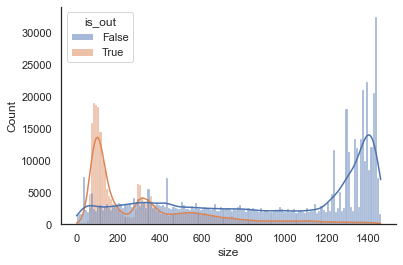

In [6]:
sns.histplot(x='size', hue='is_out', kde=True, data=packets[packets['size']<1460], binwidth=10)

In [7]:
accept_cookie = pd.read_csv(PREPROCESSED / 'Cookie-Accept-2022-11-09.csv')
accept_cookie['website_call'] = accept_cookie[accept_cookie['is_accept']]['url'].apply(get_fld)


# Top 5 banner_text
accept_cookie["banner_text"].value_counts().head()

accept all cookies    61
accept all            61
accept                51
i accept              43
alle akzeptieren      25
Name: banner_text, dtype: int64

In [71]:
print(f"Studies: {resources['study_name'].unique()}")
print(f"Called websites: {len(resources['website_call'].unique())}")
print(f"Count unique domains: first-party={len(resources['context'].unique())} / third-party={len(resources[resources['is_tp']]['hostname'].unique())}")
print(f"Average parties per domain: parties={resources.groupby('website_call')['hostname'].unique().apply(len).mean():.2f} / tracking-parties={resources[resources['is_tracker']].groupby('website_call')['hostname'].unique().apply(len).mean():.1f}")
print(f"Count cookie-accept: accepted={len(accept_cookie[accept_cookie['is_accept']])} ({len(accept_cookie[accept_cookie['is_accept']]) / len(resources['website_call'].unique()):.2f})")
print(f"Count resources: total={len(resources)} first-party={len(resources[~resources['is_tp']])} / third-party={len(resources[resources['is_tp']])}")
print(f"Count packets: total={len(packets)} in={len(packets[~packets['is_out']])} / out={len(packets[packets['is_out']])}")
print(f"Count tracking resources: is_tracker={len(resources[resources['is_tracker']])} / not is_tracker={len(resources[~resources['is_tracker']])}")
print(f"Count tracking context: is_fp={len(resources.query('is_tracker & ~is_tp'))} / is_tp={len(resources.query('is_tracker & is_tp'))}")
print(f"Count protocol http={len(resources[resources['protocol'] == 'http'])} / http2={len(resources[resources['protocol'] == 'http2'])}")

Studies: ['before accept' 'accepting policy' 'after accept']
Called websites: 933
Count unique domains: first-party=827 / third-party=2161
Average parties per domain: parties=25.52 / tracking-parties=22.3
Count cookie-accept: accepted=429 (0.46)
Count resources: total=265994 first-party=83993 / third-party=182001
Count packets: total=3578911 in=3258443 / out=320468
Count tracking resources: is_tracker=105586 / not is_tracker=160408
Count tracking context: is_fp=5669 / is_tp=99917
Count protocol http=40878 / http2=225116


In [9]:
with open(CATEGORIZAION / f'categorization Majestic-1000.json') as f:
    categorization = pd.DataFrame([url for batch in json.load(f) for url in batch['urls']])

categorization = categorization.set_index('url')
categorization.head()

,categoryNames
url,
google.com,[Search Engines & Portals]
facebook.com,[Social Networking]
youtube.com,"[Entertainment, Streaming Media & Downloads]"
twitter.com,[Social Networking]
instagram.com,"[Social Networking, Image Sharing]"


### Tracking Description

In [10]:
def calc_entropy(data):
    p_data = np.bincount(data) / len(data)
    return stats.entropy(p_data, base=2)

communications['service_entropy'] = communications['is_tracker'].apply(calc_entropy)
print("Max entropy is 1, which means web services are maximal impure delivering the same number of tracking and non tracking resources")
print(f"Mean service entropy overall={communications['service_entropy'].mean():.2f} first-party={communications[~communications['is_tp']]['service_entropy'].mean():.3f} third-party={communications[communications['is_tp']]['service_entropy'].mean():.3f}")

Max entropy is 1, which means web services are maximal impure delivering the same number of tracking and non tracking resources
Mean service entropy overall=0.03 first-party=0.072 third-party=0.023


<AxesSubplot: xlabel='tracking_ratio', ylabel='Count'>

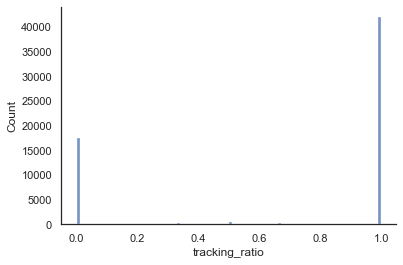

In [11]:
communications['tracking_ratio'] = communications['is_tracker'].apply(lambda x: sum(x) / len(x))
sns.histplot(x='tracking_ratio', data=communications, bins=100)

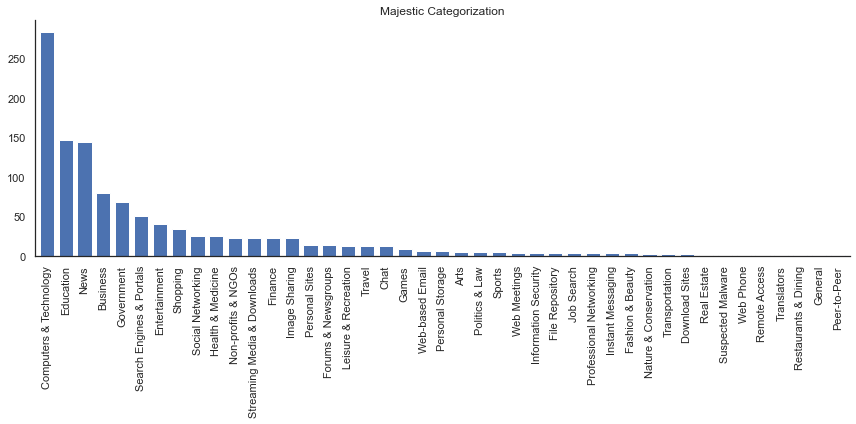

In [12]:
websites_called = resources['website_call'].unique()
num_categorization = categorization.loc[websites_called]['categoryNames'].explode().value_counts()
num_categorization.plot.bar(figsize=(12,6), width=bar_width)
plt.title("Majestic Categorization")
#plt.ylabel('Percentage [%]')
plt.tight_layout()
plt.savefig(ASSETS / f'majestic-categroization{CHART_FILE_EXTENSION}')
plt.show()

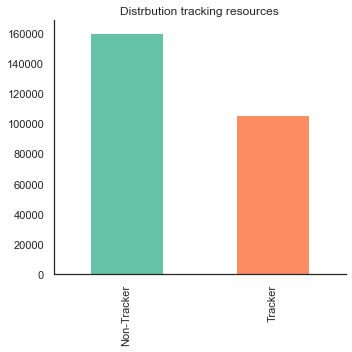

In [13]:
resources['is_tracker'].value_counts().rename(index={False: 'Non-Tracker', True: 'Tracker'}).plot(kind='bar', color=color_cycle, figsize=(5,5))
plt.title("Distrbution tracking resources")
plt.tight_layout()
plt.savefig(ASSETS / f'tracker-nontracker bar chart{CHART_FILE_EXTENSION}')
plt.show()

Number Tracker - First-Party: 5669
Number Tracker - Third-Party: 99917
Number Non-Tracker - First-Party: 78324
Number Non-Tracker - Third-Party: 82084


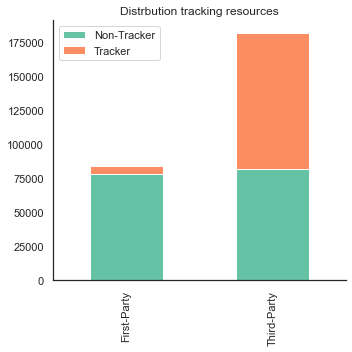

In [14]:
TF = len(resources[(resources['is_tracker']) & (~resources['is_tp'])])
TT = len(resources[(resources['is_tracker']) & (resources['is_tp'])])
NTF = len(resources[(~resources['is_tracker']) & (~resources['is_tp'])])
NTT = len(resources[(~resources['is_tracker']) & (resources['is_tp'])])
print(f"Number Tracker - First-Party: {TF}")
print(f"Number Tracker - Third-Party: {TT}")
print(f"Number Non-Tracker - First-Party: {NTF}")
print(f"Number Non-Tracker - Third-Party: {NTT}")


groups = [[NTF, NTT], [TF, TT]]
group_labels = ['Non-Tracker', 'Tracker']

pd.DataFrame(groups, columns=['First-Party', 'Third-Party'], index=group_labels).T.plot.bar(figsize=(5,5), stacked=True, color=color_cycle)
plt.title("Distrbution tracking resources")
plt.tight_layout()
plt.savefig(ASSETS / f'tracker-nontracker-by-party{CHART_FILE_EXTENSION}')
plt.show()

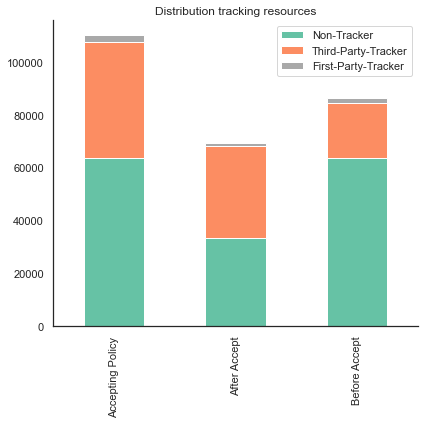

In [15]:
study_tracking = {}
for name, gp in resources.groupby('study_name'):
    study_tracking[name] = {'non_tracker': len(gp) - gp['is_tracker'].sum(),
                            'first_tracker': gp[~gp['is_tp']]['is_tracker'].sum(),
                            'third_tracker': gp[gp['is_tp']]['is_tracker'].sum()}

study_tracking = pd.DataFrame(study_tracking).T
study_tracking = study_tracking.rename(index={'accepting policy': 'Accepting Policy', 'after accept': 'After Accept', 'before accept': 'Before Accept'})

color = [color_cycle[0], color_cycle[1], 'darkgrey']
study_tracking.plot(y=['non_tracker', 'third_tracker', 'first_tracker'], kind='bar', stacked=True, color=color, figsize=(6,6))
    
plt.title("Distribution tracking resources")
plt.legend(['Non-Tracker', 'Third-Party-Tracker', 'First-Party-Tracker'])
plt.tight_layout()
plt.savefig(ASSETS / f'study-tacking-overview{CHART_FILE_EXTENSION}')
plt.show()

In [16]:
res_accept = resources.merge(accept_cookie, on='website_call')
res_accept_filtered = res_accept[(res_accept['study_name'] == 'before accept') & (res_accept['is_accept'])]
nontracker = len(res_accept_filtered[~res_accept_filtered['is_tracker']])
fptracker = len(res_accept_filtered[(res_accept_filtered['is_tracker']) & (~res_accept_filtered['is_tp'])])
tptracker = len(res_accept_filtered[(res_accept_filtered['is_tracker']) & (res_accept_filtered['is_tp'])])

study_trackingT = study_tracking.T
study_trackingT['Before Accept*'] = pd.Series({'non_tracker': nontracker, 'first_tracker': fptracker, 'third_tracker': tptracker})

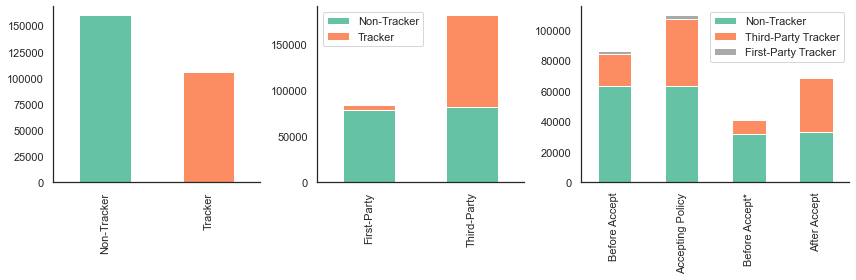

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(12,4), gridspec_kw={'width_ratios': [1, 1, 1.3]})
color = [color_cycle[0], color_cycle[1], 'darkgrey']

resources['is_tracker'].value_counts().rename(index={False: 'Non-Tracker', True: 'Tracker'}).plot(kind='bar', color=color_cycle, ax=axs[0])
pd.DataFrame(groups, columns=['First-Party', 'Third-Party'], index=group_labels).T.plot.bar(stacked=True, color=color_cycle, ax=axs[1])
#study_tracking.plot(y=['non_tracker', 'third_tracker', 'first_tracker'], kind='bar', stacked=True, color=color, ax=axs[2])
study_trackingT.T.reindex(["Before Accept", "Accepting Policy", "Before Accept*", "After Accept"]).plot(y=['non_tracker', 'third_tracker', 'first_tracker'], kind='bar', stacked=True, color=color, ax=axs[2])
axs[2].legend(['Non-Tracker', 'Third-Party Tracker', 'First-Party Tracker'])


fig.tight_layout()
fig.savefig(ASSETS / f'tracker-distribution{CHART_FILE_EXTENSION}')
plt.show()

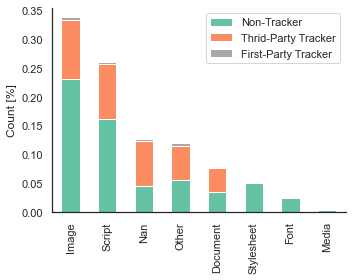

In [18]:
# nan, no content-type available for example temporary redirect
df_types = {}
for type_name, gp in resources.groupby('type', dropna=False):
    type_name = str(type_name).capitalize()
    df_types[type_name] = {'len': len(gp),
                           'nontracker': len(gp[~gp['is_tracker']]),
                           'tp_tracker': len(gp.query("is_tp & is_tracker")),
                           'fp_tracker': len(gp.query("~is_tp & is_tracker"))}
    
df_types = pd.DataFrame(df_types).T.sort_values('len', ascending=False) / len(resources)
color = [color_cycle[0], color_cycle[1], 'darkgrey']
ax = df_types.plot(y=['nontracker', 'tp_tracker', 'fp_tracker'], kind='bar', stacked=True, color=color, figsize=(5,4))
plt.ylabel('Count [%]')
plt.legend(['Non-Tracker', 'Thrid-Party Tracker', 'First-Party Tracker'])
plt.tight_layout()
plt.savefig(ASSETS / f'type-distribution{CHART_FILE_EXTENSION}')

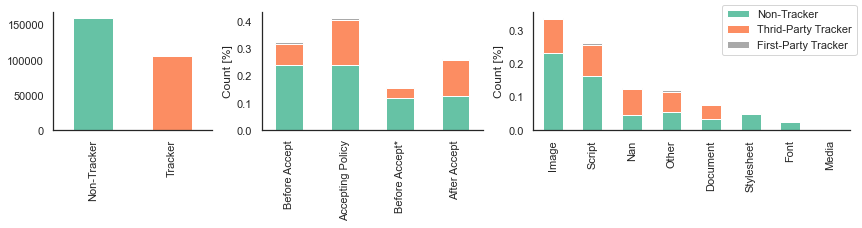

In [92]:
fig, axs = plt.subplots(1, 3, figsize=(12,3.2), gridspec_kw={'width_ratios': [1, 1.4, 2]})
color = [color_cycle[0], color_cycle[1], 'darkgrey']

study_trackingT_norm = study_trackingT / len(resources)
study_trackingT_norm.T.reindex(["Before Accept", "Accepting Policy", "Before Accept*", "After Accept"]).plot(y=['non_tracker', 'third_tracker', 'first_tracker'], kind='bar', stacked=True, color=color, ax=axs[1], legend=False)
df_types.plot(y=['nontracker', 'tp_tracker', 'fp_tracker'], kind='bar', stacked=True, color=color, ax=axs[2], legend=False)

fig.legend(['Non-Tracker', 'Thrid-Party Tracker', 'First-Party Tracker'])
resources['is_tracker'].value_counts().rename(index={False: 'Non-Tracker', True: 'Tracker'}).plot(kind='bar', color=color_cycle, ax=axs[0])
[ax.set_ylabel('Count [%]') for ax in axs[1:]]

fig.tight_layout()
fig.savefig(ASSETS / f'dataset-distribution{CHART_FILE_EXTENSION}')

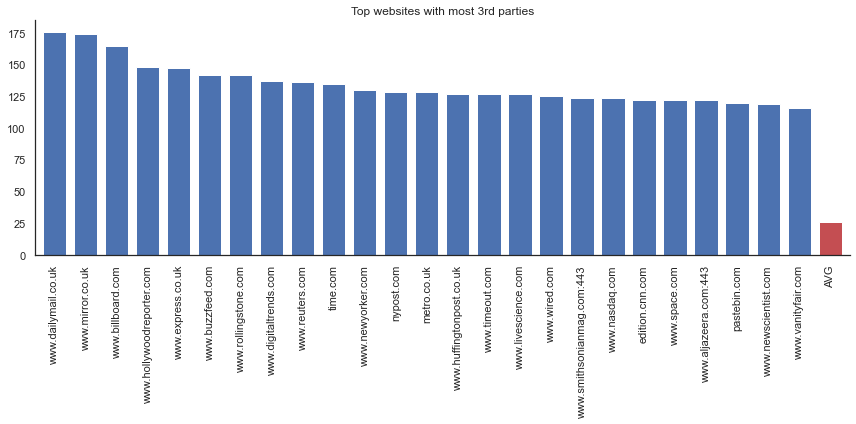

In [20]:
tp_on_websites = resources[resources['is_tp']].groupby('first_party')['hostname'].unique().apply(len) / resources.groupby('first_party')['website_call'].unique().apply(len)
top_tp_websites = tp_on_websites.sort_values(ascending=False)[:25]
top_tp_websites = pd.concat([top_tp_websites, pd.Series({'AVG': tp_on_websites.mean()})]).sort_values(ascending=False)

ax = top_tp_websites.plot(kind='bar', figsize=(12,6), width=bar_width)

highlight = 'AVG'
pos = top_tp_websites.index.get_loc(highlight)

ax.patches[pos].set_facecolor('r')

plt.title("Top websites with most 3rd parties")
plt.tight_layout()
plt.savefig(ASSETS / f'top-tp-by-first-party{CHART_FILE_EXTENSION}')
plt.show()

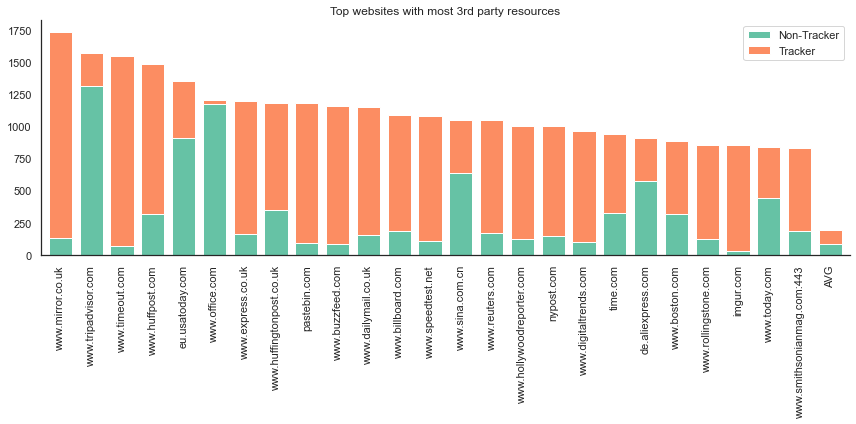

In [21]:
fps = resources.groupby('first_party')

df_fp = {}

for fp, gp in fps:
    n = len(gp['website_call'].unique())
    df_fp[fp] = {'third-party requests': len(gp[gp['is_tp']]) / n, 'tracker': len(gp[(gp['is_tp']) &(gp['is_tracker'])]) / n}

df_fp = pd.DataFrame(df_fp).T
df_fp['nontracker'] = df_fp['third-party requests'] - df_fp['tracker']
df_fp_top = df_fp.sort_values(by='third-party requests', ascending=False)[:25]

avg = df_fp.mean()
df_fp_top.loc['AVG'] = avg

df_fp_top.sort_values(by='third-party requests', ascending=False).plot(y=['nontracker', 'tracker'], width=bar_width, kind="bar", stacked=True, color=color_cycle, figsize=(12,6))

plt.title("Top websites with most 3rd party resources")
ax.set_xlabel("Domain")
plt.legend(["Non-Tracker", "Tracker"])
plt.tight_layout()
plt.savefig(ASSETS / f'top-tp-tracking-resources-by-first-party{CHART_FILE_EXTENSION}')
plt.show()

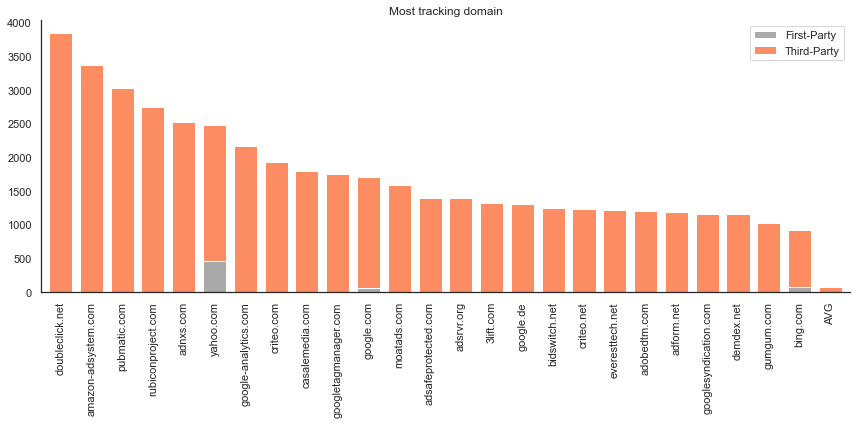

In [22]:
tracker_domain = pd.DataFrame()
tracker_domain['domain'] = resources[resources['is_tracker']]['hostname']
tracker_domain['is_tp'] = resources[resources['is_tracker']]['is_tp']
tracker_domain_count = {}
for party, gp in tracker_domain.groupby('domain'):
    tracker_domain_count[party] = {'tracker': len(gp), 'tp': gp['is_tp'].sum(), 'fp': len(gp) - gp['is_tp'].sum()}

tracker_domain_count = pd.DataFrame(tracker_domain_count).T

top_tracker_domain_count = tracker_domain_count.sort_values(by='tracker', ascending=False)[:25]
avg = tracker_domain_count.mean()
top_tracker_domain_count.loc['AVG'] = avg

color = ['darkgrey', color_cycle[1]]
top_tracker_domain_count.sort_values(by='tracker', ascending=False).plot(y=['fp', 'tp'], width=bar_width, kind='bar', stacked=True, color=color, figsize=(12,6))
    
plt.title("Most tracking domain")
plt.legend(['First-Party', 'Third-Party'])
plt.tight_layout()
plt.savefig(ASSETS / f'most-tracking-domain{CHART_FILE_EXTENSION}')
plt.show()

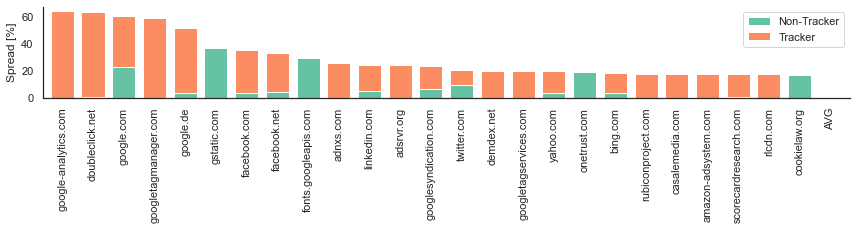

In [88]:
third_parties = pd.DataFrame()
third_parties['domain'] = resources[resources['is_tp']]['hostname']
third_parties['first_party'] = resources[resources['is_tp']]['first_party']
third_parties['is_tracker'] = resources[resources['is_tp']]['is_tracker']
third_party_count = {}
for party, gp in third_parties.groupby('domain'):
    third_party_count[party] = {'spread': len(gp['first_party'].unique()), 'is_tracker': gp['is_tracker'].sum() / len(gp)}

third_party_count = pd.DataFrame(third_party_count).T
third_party_count['spread'] = 100 * third_party_count['spread'] / len(resources['first_party'].unique())
third_party_count['tracker'] = third_party_count['spread'] * third_party_count['is_tracker']
third_party_count['nontracker'] = third_party_count['spread'] * (1 - third_party_count['is_tracker'])

top_third_party_count = third_party_count.sort_values(by='spread', ascending=False)[:25]
avg = third_party_count.mean()
top_third_party_count.loc['AVG'] = avg

ax = top_third_party_count.sort_values(by='spread', ascending=False).plot(y=['nontracker', 'tracker'], width=bar_width,
                                                                      kind="bar", stacked=True, color=color_cycle, figsize=(12,3.3))
#plt.title("Most widespread 3rd party")
ax.set_ylabel("Spread [%]")
plt.legend(["Non-Tracker", "Tracker"])
plt.tight_layout()
plt.savefig(ASSETS / f'top-tp-domain-by-first-party{CHART_FILE_EXTENSION}')
plt.show()

In [24]:
top_tps = top_third_party_count.index
"Top 25 tp hostnames occurs in first-party context with p={:.4f}".format(resources.groupby('website_call').agg({'hostname': lambda x: x.tolist()})['hostname'].apply(lambda x: any(xx in top_tps for xx in set(x))).sum() / 933)

'Top 25 tp hostnames occurs in first-party context with p=0.8489'

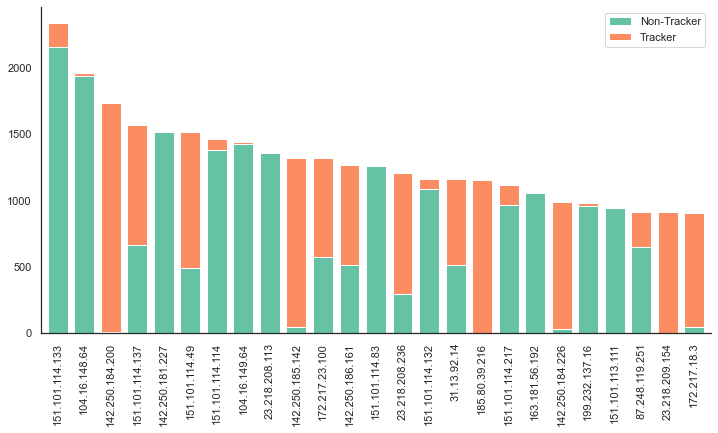

In [25]:
ip_tracker = {}
for ip, gp in resources.groupby('ip'):
    ip_tracker[ip] = {'len': len(gp),
                       'nontracker': len(gp[~gp['is_tracker']]),
                       'tracker': len(gp[gp['is_tracker']]),
                       'hostname': gp['hostname'].unique(),
                       'hostname_len': len(gp['hostname'].unique())}
    
ip_tracker = pd.DataFrame(ip_tracker).T.sort_values(by='len', ascending=False)
ip_tracker.iloc[:25].plot(y=['nontracker', 'tracker'], kind="bar", width=bar_width, stacked=True, color=color_cycle, figsize=(12,6))
plt.legend(['Non-Tracker', 'Tracker'])

In [26]:
print(f"Mean domains per ip: {resources.groupby('ip')['hostname'].unique().apply(len).mean():.4f}")
print(f"Mean domains per tracker ip: {resources[resources['is_tracker']].groupby('ip')['hostname'].unique().apply(len).mean():.4f}")
print(f"Mean domains per non-tracker ip: {resources[~resources['is_tracker']].groupby('ip')['hostname'].unique().apply(len).mean():.4f}")
ip_tracker['is_popular_tp'] = ip_tracker['hostname'].apply(lambda x: any(domain in top_third_party_count.index for domain in x))
print(f"Mean domains per ip for popluar tp: {ip_tracker[ip_tracker['is_popular_tp']]['hostname_len'].mean():.4f}")
print(f"Top most domains per ip:")
display(ip_tracker.sort_values(by='hostname_len', ascending=False).head())

Mean domains per ip: 1.2634
Mean domains per tracker ip: 1.1584
Mean domains per non-tracker ip: 1.2442
Mean domains per ip for popluar tp: 1.9073
Top most domains per ip:


,len,nontracker,tracker,hostname,hostname_len,is_popular_tp
15.236.176.210,273,15,258,"[omtrdc.net, news.com.au, boston.com, dowjoneson.com, gamespot.com, cnet.com, science.org, aarp.org, intel.com, webex.com, sky.com, nba.com, nbcnews.com, telegraph.co.uk, adobedc.net, imf.org, verisign.com, welt.de, acs.org, independent.co.uk, hilton.com, elsevier.com, demdex.net, globalnews.ca, microsoft.com, vmware.com, 2o7.net, cisco.com, politico.com, cbsnews.com, fifa.com, foodnetwork.com, sap.com, msnbc.com, adobe.com, redcross.org, elpais.com, last.fm, medscape.com, hbr.org, samsung.com, marriott.com]",42,True
151.101.114.133,2342,2159,183,"[sagepub.com, pitt.edu, krxd.net, slate.com, healthline.com, filestackapi.com, colorado.edu, wistia.com, yale.edu, billboard.com, mparticle.com, ted.com, tedcdn.com, vogue.de, forbes.com, harvard.edu, theatlantic.com, euronews.com, w-x.co, arizona.edu, zend.com, nikkei.com, braze.com, stanford.edu, asu.edu, cbsinteractive.com, paypalobjects.com, paypal-mktg.com, dictionary.com, smh.com.au, ffx.io, epimg.net, elpais.com, prisasd.com, weather.com]",35,False
15.188.95.229,277,10,267,"[omtrdc.net, cancer.gov, elsevier.com, apple.com, demdex.net, adobedc.net, science.org, foxbusiness.com, hp.com, bostonglobe.com, dtcidev.co, espn.com, foxnews.com, consumerreports.org, ihg.com, lww.com, zdnet.com, lenovo.com, nejm.org, cbc.ca, box.com, loc.gov, webmd.com, spiegel.de, nvidia.com, accenture.com, nbcuni.com, 2o7.net, microsoft.com, americanexpress.com, disney.de, dell.com, deloitte.com, cbsnews.com]",34,True
13.36.218.177,433,4,429,"[omtrdc.net, 2o7.net, worldbank.org, cancer.gov, ups.com, aarp.org, cnn.com, standard.co.uk, webex.com, iheart.com, nbcnews.com, playstation.com, eurekalert.org, congress.gov, panasonic.com, dtcidev.co, nationalgeographic.com, spiegel.de, today.com, accenture.com, thestar.com, elsevier.com, kaspersky.de, timeout.com, ibm.com, mlb.com, fedex.com, wiley.com, cnet.com, nike.com, census.gov, microsoft.com]",32,False
151.101.114.132,1164,1090,74,"[perl.org, ispot.tv, ziffstatic.com, outbrainimg.com, placed.com, outbrain.com, foxnews.com, esa.int, ketchcdn.com, hubvisor.io, techrepublic.com, wfxtriggers.com, amplitude.com, nikkei.com, perl.com, podbean.com, mutinycdn.com, theconversation.com, bcbits.com, tagcommander.com]",20,False


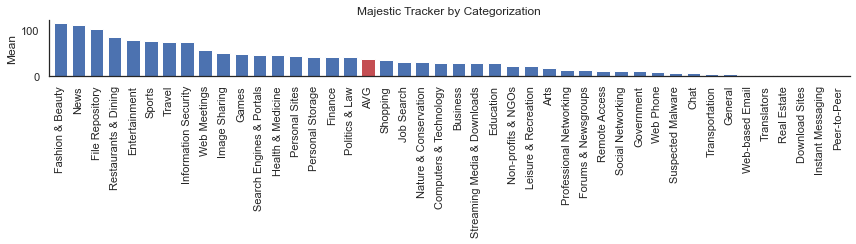

In [85]:
num_tracker = resources[resources['is_tracker']].groupby('website_call')['is_tracker'].count()
num_studies = resources[resources['is_tracker']].groupby('website_call')['study_name'].unique().apply(len)
num_tracker = pd.DataFrame([num_tracker, num_studies]).T
num_tracker['is_tracker'] = num_tracker['is_tracker'] / num_tracker['study_name']
num_tracker = num_tracker.join(categorization)
num_tracker = num_tracker.explode('categoryNames')
num_tracker = num_tracker.groupby('categoryNames')['is_tracker'].sum()
normalized_num_tracker = (num_tracker / num_categorization)
normalized_num_tracker = pd.concat([normalized_num_tracker, pd.Series({'AVG': normalized_num_tracker.mean()})]).sort_values(ascending=False)
ax = normalized_num_tracker.plot.bar(figsize=(12,3.5), width=bar_width)

highlight = 'AVG'
pos = normalized_num_tracker.index.get_loc(highlight)

ax.patches[pos].set_facecolor('r')

plt.title("Majestic Tracker by Categorization")
plt.ylabel("Mean")
plt.tight_layout()
plt.savefig(ASSETS / f'majestic-categorization-tracker{CHART_FILE_EXTENSION}')
plt.show()

In [28]:
res_cat = resources.merge(categorization, left_on='website_call', right_on='url')
res_cat = res_cat.explode('categoryNames')
print("Mean resources count: {:.2f}".format(resources[~resources['is_tracker']].groupby('website_call')['id'].count().mean()))
print("Mean resources count of last 20 categories: {:.2f}".format(res_cat[(res_cat['categoryNames'].isin(normalized_num_tracker.iloc[-20:].index)) & (~res_cat['is_tracker'])].groupby('website_call')['id'].count().mean()))

Mean resources count: 171.93
Mean resources count of last 20 categories: 130.42


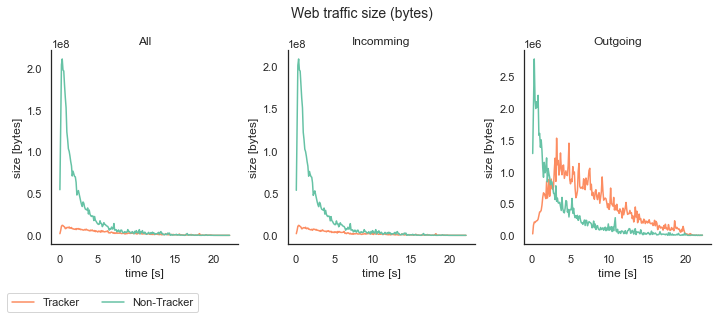

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(10,4))
X = np.arange(0, packets['rel_time'].max()+0.1, 0.1)

# all
Y = packets[packets['is_tracker']].groupby(pd.cut(packets['rel_time'], X))['size'].sum()
Y.index = [idx.right for idx in Y.index]
Y.plot(ax=axs[0], color=color_cycle[1], label='Tracker')
Y = packets[~packets['is_tracker']].groupby(pd.cut(packets['rel_time'], X))['size'].sum()
Y.index = [idx.right for idx in Y.index]
Y.plot(ax=axs[0], color=color_cycle[0], label='Non-Tracker')
axs[0].set_title("All")
axs[0].set_xlabel("time [s]")
axs[0].set_ylabel("size [bytes]")

# incoming
Y = packets[(packets['is_tracker'] & (~packets['is_out']))].groupby(pd.cut(packets['rel_time'], X))['size'].sum()
Y.index = [idx.right for idx in Y.index]
Y.plot(ax=axs[1], color=color_cycle[1], label='Tracker')
Y = packets[(~packets['is_tracker']) & (~packets['is_out'])].groupby(pd.cut(packets['rel_time'], X))['size'].sum()
Y.index = [idx.right for idx in Y.index]
Y.plot(ax=axs[1], color=color_cycle[0], label='Non-Tracker')
axs[1].set_title("Incomming")
axs[1].set_xlabel("time [s]")
axs[1].set_ylabel("size [bytes]")

# outgoing
Y = packets[(packets['is_tracker'] & (packets['is_out']))].groupby(pd.cut(packets['rel_time'], X))['size'].sum()
Y.index = [idx.right for idx in Y.index]
Y.plot(ax=axs[2], color=color_cycle[1], label='Tracker')
Y = packets[(~packets['is_tracker']) & (packets['is_out'])].groupby(pd.cut(packets['rel_time'], X))['size'].sum()
Y.index = [idx.right for idx in Y.index]
Y.plot(ax=axs[2], color=color_cycle[0], label='Non-Tracker')
axs[2].set_title("Outgoing")
axs[2].set_xlabel("time [s]")
axs[2].set_ylabel("size [bytes]")

fig.suptitle("Web traffic size (bytes)", fontsize=14)
fig.legend(['Tracker', 'Non-Tracker'], ncol=2, loc='lower left', bbox_to_anchor=(0,-.1), bbox_transform=fig.transFigure)
fig.tight_layout()
fig.savefig(ASSETS / f'web-traffic-size{CHART_FILE_EXTENSION}')

## Feature Engineering

In [30]:
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

    
def train_prevalence_ip(df):
    len_unique_fp = len(df['first_party'].unique())
    prevalence = df.groupby('ip').apply(lambda gp: len(gp['first_party'].unique()) / len_unique_fp)
    prevalence.name = 'ip_prevalence'
    return prevalence

def min_coll(collection):
    return np.min(collection) if len(collection) > 0 else None

def max_coll(collection):
    return np.max(collection) if len(collection) > 0 else None

def descriptive_statistics(df, col, level='R', precision=3, agg=None):
    X = pd.DataFrame()
    s = df[col] if agg is None else df[col].apply(lambda x: [agg(rs) for rs in x])
    col_name = lambda col, f: f"{level}:{f}({col})"
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        
        X[col_name(col, "sum")] = s.apply(lambda x: np.sum(x)).round(precision)
        X[col_name(col, "mean")] = s.apply(lambda x: np.mean(x)).round(precision)
        X[col_name(col, "rsd")] = s.apply(lambda x: np.std(x) / np.mean(x)).round(precision)
        X[col_name(col, "min")] = s.apply(min_coll).round(precision)
        X[col_name(col, "max")] = s.apply(max_coll).round(precision)
        X[col_name(col, "span")] = X[col_name(col, "max")] - X[col_name(col, "min")]
    
    return X

def remove_dupl(row):
    packets = pd.Series(row['packets'], dtype='object').drop_duplicates()
    incoming = pd.Series(row['incoming'], dtype='object').drop_duplicates()
    outgoing = pd.Series(row['outgoing'], dtype='object').drop_duplicates()
    
    sizes = [row['sizes'][i] for i in packets.index]
    rel_time = [row['rel_time'][i] for i in packets.index]
    
    incoming_sizes = [row['incoming_sizes'][i] for i in incoming.index]
    outgoing_sizes = [row['outgoing_sizes'][i] for i in outgoing.index]
    
    return pd.Series([packets.tolist(), incoming.tolist(), outgoing.tolist(), sizes, incoming_sizes, outgoing_sizes, rel_time])
  
def extract_communication_features(df, prevalence_ip=None, resource_inf_available=True):
    gp = df.groupby(['study_name', 'website_call', 'ip'])
    if resource_inf_available:
        rs_tolist = lambda x: x.tolist()
    else:
        rs_tolist =  lambda x: [p for r in x.tolist() for p in r]
        
    fns = {col: rs_tolist for col in ['packets', 'incoming', 'outgoing', 'sizes', 'incoming_sizes', 'outgoing_sizes', 'rel_time']}
    communication = gp.agg(fns | {'delta_req_time': lambda rs: rs.tolist(), 'org': lambda rs: rs.tolist()[0]})    
        
    if resource_inf_available:
        rename = {'outgoing': 'out packets', 'outgoing_sizes': 'out resource sizes', 'sizes': 'resource sizes',
                'incoming': 'in packets', 'incoming_sizes': 'in resource sizes', 'rel_time': 'rel time', 
                'delta_req_time': 'delta resource time'}
    else:
        rename = {'outgoing': 'out packets', 'outgoing_sizes': 'out packet sizes', 'sizes': 'packet sizes',
                'incoming': 'in packets', 'incoming_sizes': 'in packet sizes', 'rel_time': 'rel time', 
                'delta_req_time': 'delta resource time'}
        
        # since multiplexing in http2 multiple resources can be transmitted via same tcp
        cols = ['packets', 'incoming', 'outgoing', 'sizes', 'incoming_sizes', 'outgoing_sizes', 'rel_time']
        communication[cols] = communication[cols].apply(remove_dupl, axis=1)
    
    communication_r = communication.rename(columns=rename)
    
    X = pd.DataFrame()
    
    cols = ['packets', 'in packets', 'out packets']
    if resource_inf_available:
        X['C:count(resources)'] = communication['packets'].apply(len)
        for col in cols:
            X[f"C:count({col})"] = communication_r[col].apply(lambda x: len([p for rs in x for p in rs]))
    else:
        for col in cols:
            X[f"C:count({col})"] = communication_r[col].apply(len)
           
    
    if resource_inf_available:
        cols = ['resource sizes', 'in resource sizes', 'out resource sizes']
        for col in cols:
            X = pd.concat([X, descriptive_statistics(communication_r, col, level='C', agg=sum)], axis=1)
        
        X = pd.concat([X, descriptive_statistics(communication_r, 'rel time', level='C', agg=min)], axis=1)
        X = pd.concat([X, descriptive_statistics(communication_r, 'delta resource time', level='C')], axis=1)
    
    else:
        cols = ['packet sizes', 'in packet sizes', 'out packet sizes']
        for col in cols:
            X = pd.concat([X, descriptive_statistics(communication_r, col, level='C')], axis=1)
            
        X = pd.concat([X, descriptive_statistics(communication_r, 'rel time', level='C')], axis=1)
        
        
    #X['C:enc(ip)'] = communication.index.get_level_values(2).factorize()[0]
    #X['C:enc(org)'] = communication['org'].factorize()[0]
    #ips = pd.DataFrame(communication.index.get_level_values(2).str.split('.').tolist(), index=communication.index, columns=['C:ip[0]', 'C:ip[1]', 'C:ip[2]', 'C:ip[3]']).astype(int)
    #X = pd.concat([X, ips], axis=1)
    if prevalence_ip is not None:
        communication = communication.join(prevalence_ip, on='ip')
        X['C:prevalence(ip)'] = communication['ip_prevalence']
        
    #X.drop(columns=['C:min(delta resource time)', 'C:span(delta resource time)', 'C:sum(rel time)'], inplace=True)
    cols = X.columns
    X = df.merge(X, left_on=['study_name', 'website_call', 'ip'], right_index=True)
    X = X.loc[df.index]
    
    return X[cols].fillna(-1)

def extract_resource_features(df):
    df_r = df.rename(columns={'outgoing': 'out packets', 'outgoing_sizes': 'out packet sizes', 'sizes': 'packet sizes',
                                                    'incoming': 'in packets', 'incoming_sizes': 'in packet sizes',
                                                    'rel_time': 'rel time'})
    
    X = pd.DataFrame()
    cols = ['packets', 'in packets', 'out packets']
    for col in cols:
        X[f"R:count({col})"] = df_r[col].apply(len)
    
    cols = ['packet sizes', 'in packet sizes', 'out packet sizes', 'rel time']
    for col in cols:
        X = pd.concat([X, descriptive_statistics(df_r, col, level='R')], axis=1)
        
    X['R:delta resource time'] = df['delta_req_time']
    #X.drop(columns=['R:sum(rel time)'], inplace=True)
    
    return X.fillna(-1)

def extract_features(df, prevalence_ip=None, feature_names=False, resource_inf_available=True):
    com_features = extract_communication_features(df, prevalence_ip, resource_inf_available)
    res_features = extract_resource_features(df)
    
    X = pd.concat([com_features, res_features], axis=1)
    
    if feature_names:
        return X, {'communication': com_features.columns, 'resource': res_features.columns}
    else:
        return X

prevalence_ip = train_prevalence_ip(resources)
X_resources = extract_features(resources, prevalence_ip, resource_inf_available=False)
X_resources['is_tracker'] = resources['is_tracker']
X_resources.head()

,C:count(packets),C:count(in packets),C:count(out packets),C:sum(packet sizes),C:mean(packet sizes),C:rsd(packet sizes),C:min(packet sizes),C:max(packet sizes),C:span(packet sizes),C:sum(in packet sizes),C:mean(in packet sizes),C:rsd(in packet sizes),C:min(in packet sizes),C:max(in packet sizes),C:span(in packet sizes),C:sum(out packet sizes),C:mean(out packet sizes),C:rsd(out packet sizes),C:min(out packet sizes),C:max(out packet sizes),C:span(out packet sizes),C:sum(rel time),C:mean(rel time),C:rsd(rel time),C:min(rel time),C:max(rel time),C:span(rel time),C:prevalence(ip),R:count(packets),R:count(in packets),R:count(out packets),R:sum(packet sizes),R:mean(packet sizes),R:rsd(packet sizes),R:min(packet sizes),R:max(packet sizes),R:span(packet sizes),R:sum(in packet sizes),R:mean(in packet sizes),R:rsd(in packet sizes),R:min(in packet sizes),R:max(in packet sizes),R:span(in packet sizes),R:sum(out packet sizes),R:mean(out packet sizes),R:rsd(out packet sizes),R:min(out packet sizes),R:max(out packet sizes),R:span(out packet sizes),R:sum(rel time),R:mean(rel time),R:rsd(rel time),R:min(rel time),R:max(rel time),R:span(rel time),R:delta resource time,is_tracker
0,2,1,1,782,391.000,0.113,347,435,88,435.0,435.000,0.000,435.0,435.0,0.0,347,347.000,0.000,347,347,0,0.191,0.095,1.000,0.000,0.191,0.191,0.001139,2,1,1,782,391.000,0.113,347,435,88,435.0,435.000,0.000,435.0,435.0,0.0,347.0,347.0,0.0,347.0,347.0,0.0,0.191,0.095,1.000,0.000,0.191,0.191,0.000000,False
1,2,1,1,889,444.500,0.021,435,454,19,435.0,435.000,0.000,435.0,435.0,0.0,454,454.000,0.000,454,454,0,0.192,0.096,1.000,0.000,0.192,0.192,0.001139,2,1,1,889,444.500,0.021,435,454,19,435.0,435.000,0.000,435.0,435.0,0.0,454.0,454.0,0.0,454.0,454.0,0.0,0.192,0.096,1.000,0.000,0.192,0.192,0.000000,False
2,369,322,47,437023,1184.344,0.416,18,1460,1442,432279.0,1342.481,0.212,18.0,1460.0,1442.0,4744,100.936,0.436,56,351,295,159.146,0.431,0.208,0.257,0.564,0.307,0.001139,3,2,1,2116,705.333,0.757,305,1460,1155,1765.0,882.500,0.654,305.0,1460.0,1155.0,351.0,351.0,0.0,351.0,351.0,0.0,0.800,0.267,0.027,0.257,0.272,0.015,0.000000,False
3,369,322,47,437023,1184.344,0.416,18,1460,1442,432279.0,1342.481,0.212,18.0,1460.0,1442.0,4744,100.936,0.436,56,351,295,159.146,0.431,0.208,0.257,0.564,0.307,0.001139,16,15,1,21400,1337.500,0.251,56,1460,1404,21344.0,1422.933,0.041,1300.0,1460.0,160.0,56.0,56.0,0.0,56.0,56.0,0.0,4.618,0.289,0.014,0.273,0.290,0.017,0.016286,False
4,369,322,47,437023,1184.344,0.416,18,1460,1442,432279.0,1342.481,0.212,18.0,1460.0,1442.0,4744,100.936,0.436,56,351,295,159.146,0.431,0.208,0.257,0.564,0.307,0.001139,3,2,1,2863,954.333,0.594,163,1460,1297,2700.0,1350.000,0.081,1240.0,1460.0,220.0,163.0,163.0,0.0,163.0,163.0,0.0,0.938,0.313,0.023,0.303,0.318,0.015,0.029657,False


In [31]:
com_features = [col for col in X_resources.columns if col.startswith('C:')]
helper = X_resources[com_features].drop_duplicates()
helper = helper.join(resources)[com_features + ['study_name', 'website_call', 'ip']]
communications = communications.merge(helper, left_index=True, right_on=['study_name', 'website_call', 'ip']).set_index(['study_name', 'website_call', 'ip'])

## Feature Analysis

### Visualizing

In [32]:
def remove_outlier_attr(df, cols, attr='is_tracker'):
    df = df.copy()
    gps = df.groupby(attr)
    for col in cols:
        s = []
        for _, gp in gps[col]:
            q1 = gp.quantile(0.25)
            q3 = gp.quantile(0.75)
            iqr = q3-q1
            fence_low  = q1-1.5*iqr
            fence_high = q3+1.5*iqr
            s.append(gp[(gp >= fence_low) & (gp <= fence_high)])
        
        df[col] = pd.concat(s)

    return df

X_resources_wo = remove_outlier_attr(X_resources, X_resources.columns[:-1])

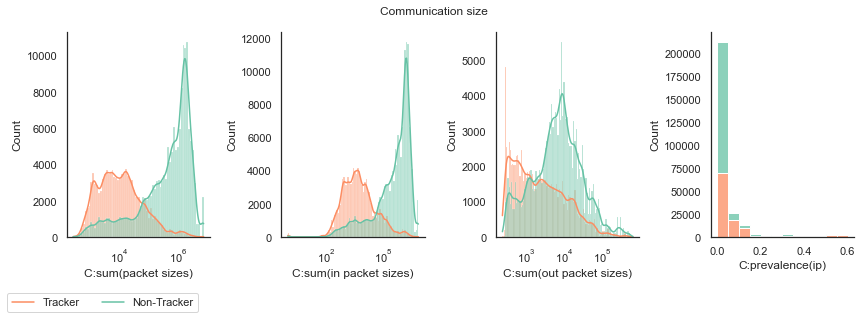

In [33]:
cols = ['C:sum(packet sizes)', 'C:sum(in packet sizes)', 'C:sum(out packet sizes)', 'C:prevalence(ip)']
fig, axs = plt.subplots(1, len(cols), figsize=(12,4))
for ax, col in zip(axs, cols):
    if col.startswith('C:sum'):
        sns.histplot(x=col, hue="is_tracker", data=X_resources.replace(to_replace=0, value=1), palette="Set2", kde=True, ax=ax, legend=False, log_scale=True)
    else:
        sns.histplot(x=col, hue="is_tracker", data=X_resources, multiple="stack", palette="Set2", ax=ax, legend=False, binwidth=0.05)
        #ax.set_yscale('log')
fig.legend(['Tracker', 'Non-Tracker'], ncol=2, loc='lower left', bbox_to_anchor=(0,-.1), bbox_transform=fig.transFigure)
fig.suptitle("Communication size")
fig.tight_layout()
fig.savefig(ASSETS / f'feature-communication-length{CHART_FILE_EXTENSION}')

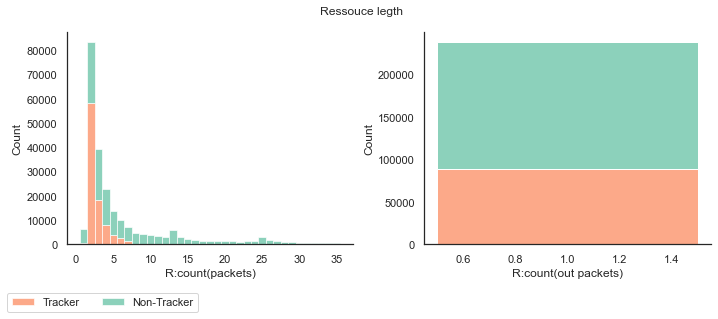

In [34]:
cols = ['R:count(packets)', 'R:count(out packets)']
fig, axs = plt.subplots(1, len(cols), figsize=(10,4))
for ax, col in zip(axs, cols):
    sns.histplot(x=col, hue="is_tracker", data=X_resources_wo, palette="Set2", multiple="stack", ax=ax, legend=False, discrete=True)
    
fig.legend(['Tracker', 'Non-Tracker'], ncol=2, loc='lower left', bbox_to_anchor=(0,-.1), bbox_transform=fig.transFigure)
fig.suptitle("Ressouce legth")
fig.tight_layout()
fig.savefig(ASSETS / f'feature-packet-count{CHART_FILE_EXTENSION}')

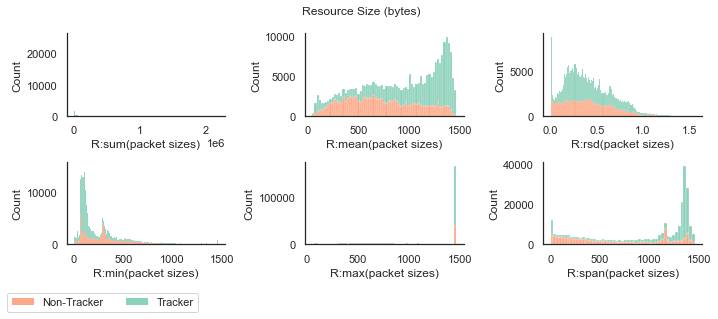

In [35]:
cols = [['R:sum(packet sizes)', 'R:mean(packet sizes)', 'R:rsd(packet sizes)'], ['R:min(packet sizes)', 'R:max(packet sizes)', 'R:span(packet sizes)']]
fig, axs = plt.subplots(len(cols), len(cols[0]), figsize=(10,4))
for i, row in enumerate(cols):
    for ax, col in zip(axs[i], row):
        if col == 'R:sum(sizes)':
            sns.histplot(x=col, hue="is_tracker", data=X_resources, palette="Set2", multiple="stack", ax=ax, legend=False, log_scale=True)
        else:
            sns.histplot(x=col, hue="is_tracker", data=X_resources, palette="Set2", multiple="stack", ax=ax, legend=False)

fig.legend(['Non-Tracker', 'Tracker'], ncol=2, loc='lower left', bbox_to_anchor=(0,-.1), bbox_transform=fig.transFigure)
fig.suptitle("Resource Size (bytes)")
fig.tight_layout()
fig.savefig(ASSETS / f'feature-size{CHART_FILE_EXTENSION}')

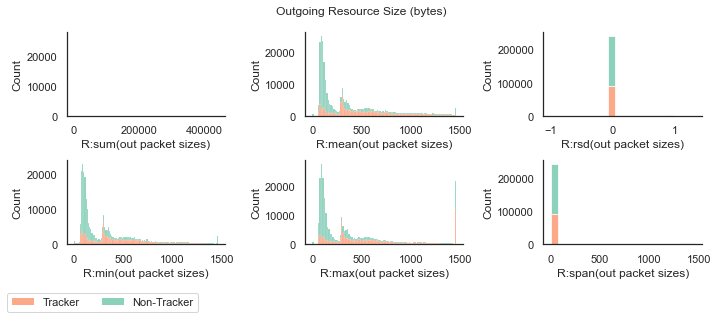

In [36]:
cols = [['R:sum(out packet sizes)', 'R:mean(out packet sizes)', 'R:rsd(out packet sizes)'], ['R:min(out packet sizes)', 'R:max(out packet sizes)', 'R:span(out packet sizes)']]
fig, axs = plt.subplots(len(cols), len(cols[0]), figsize=(10,4))
for i, row in enumerate(cols):
    for ax, col in zip(axs[i], row):
        if col == 'R:sum(out sizes)':
            sns.histplot(x=col, hue="is_tracker", data=X_resources.replace(to_replace=0, value=1), palette="Set2", multiple="stack", ax=ax, legend=False, log_scale=True)
        else:
            sns.histplot(x=col, hue="is_tracker", data=X_resources, palette="Set2", multiple="stack", ax=ax, legend=False)

fig.legend(['Tracker', 'Non-Tracker'], ncol=2, loc='lower left', bbox_to_anchor=(0,-.1), bbox_transform=fig.transFigure)
fig.suptitle("Outgoing Resource Size (bytes)")
plt.tight_layout()
fig.tight_layout()
fig.savefig(ASSETS / f'feature-outgoing-size{CHART_FILE_EXTENSION}')

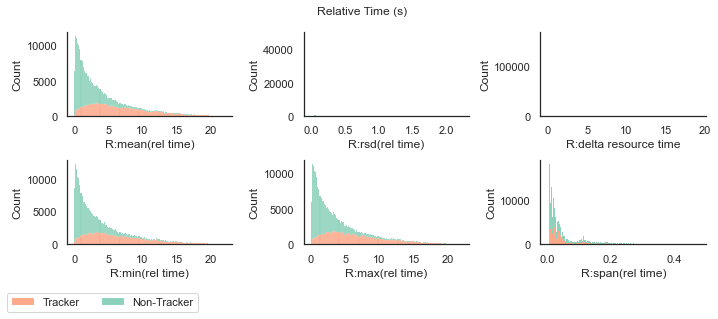

In [37]:
cols = [['R:mean(rel time)', 'R:rsd(rel time)', 'R:delta resource time'], ['R:min(rel time)', 'R:max(rel time)', 'R:span(rel time)']]
fig, axs = plt.subplots(len(cols), len(cols[0]), figsize=(10,4))
for i, row in enumerate(cols):
    for ax, col in zip(axs[i], row):
        if col == 'R:sum(rel time)':
            sns.histplot(x=col, hue="is_tracker", data=X_resources, palette="Set2", multiple="stack", ax=ax, legend=False, log_scale=True)
        else:
            sns.histplot(x=col, hue="is_tracker", data=X_resources, palette="Set2", multiple="stack", ax=ax, legend=False)

axs[1][2].set_xlim(-0.02, 0.5)
fig.legend(['Tracker', 'Non-Tracker'], ncol=2, loc='lower left', bbox_to_anchor=(0,-.1), bbox_transform=fig.transFigure)
fig.suptitle("Relative Time (s)")
fig.tight_layout()
fig.savefig(ASSETS / f'feature-rel-time{CHART_FILE_EXTENSION}')

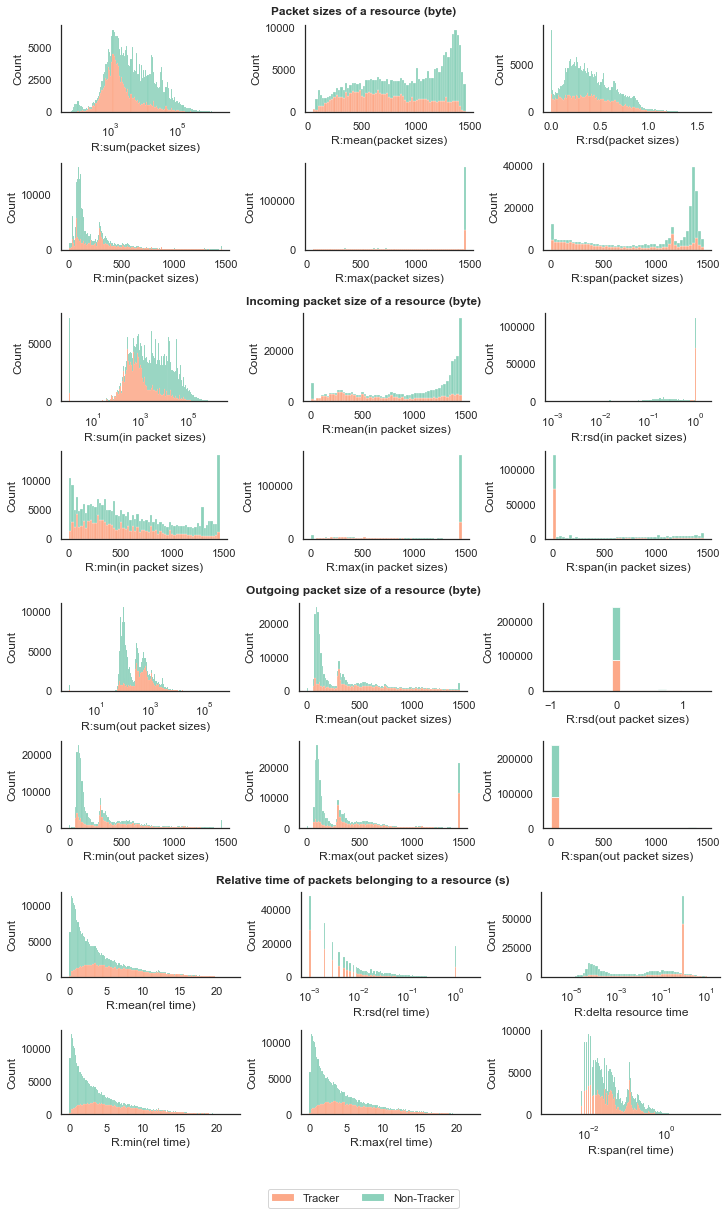

In [38]:
cols3d = [[['R:sum(packet sizes)', 'R:mean(packet sizes)', 'R:rsd(packet sizes)'],
          ['R:min(packet sizes)', 'R:max(packet sizes)', 'R:span(packet sizes)']],
          
        [['R:sum(in packet sizes)', 'R:mean(in packet sizes)', 'R:rsd(in packet sizes)'], 
         ['R:min(in packet sizes)', 'R:max(in packet sizes)', 'R:span(in packet sizes)']],
        
        [['R:sum(out packet sizes)', 'R:mean(out packet sizes)', 'R:rsd(out packet sizes)'], 
         ['R:min(out packet sizes)', 'R:max(out packet sizes)', 'R:span(out packet sizes)']],
        
        [['R:mean(rel time)', 'R:rsd(rel time)', 'R:delta resource time'], 
         ['R:min(rel time)', 'R:max(rel time)', 'R:span(rel time)']]]


fig = plt.figure(constrained_layout=True, figsize=(10,np.prod(np.asarray(cols3d).shape[:2])*2))
subfigs = fig.subfigures(nrows=len(cols3d), ncols=1)
titles = ["Packet sizes of a resource (byte)", "Incoming packet size of a resource (byte)", "Outgoing packet size of a resource (byte)", "Relative time of packets belonging to a resource (s)"]

xlogs = ['R:sum(packet sizes)', 'R:sum(in packet sizes)', 'R:rsd(in packet sizes)', 'R:sum(out packet sizes)', 'R:rsd(rel time)', 'R:delta resource time', 'R:span(rel time)']
ylogs = []  

for title, subfig, cols2d in zip(titles, subfigs, cols3d):
    subfig.suptitle(title, fontweight='bold')
    axs = subfig.subplots(len(cols2d), len(cols2d[0]))

    for i, cols1d in enumerate(cols2d):
        for ax, col in zip(axs[i], cols1d):
            if any(col == c for c in xlogs):
                sns.histplot(x=col, hue="is_tracker", data=X_resources.replace(to_replace=0, value=1), palette="Set2", multiple="stack", ax=ax, legend=False, log_scale=True)
            else:
                sns.histplot(x=col, hue="is_tracker", data=X_resources, palette="Set2", multiple="stack", ax=ax, legend=False)
             
            if any(c == col for c in ylogs):
                ax.set_yscale('log')
                
                                
fig.legend(['Tracker', 'Non-Tracker'], ncol=2, loc='lower center', bbox_to_anchor=(0.5,-0.05), bbox_transform=fig.transFigure)
fig.savefig(ASSETS / f'feature-distribution{CHART_FILE_EXTENSION}', bbox_inches='tight')

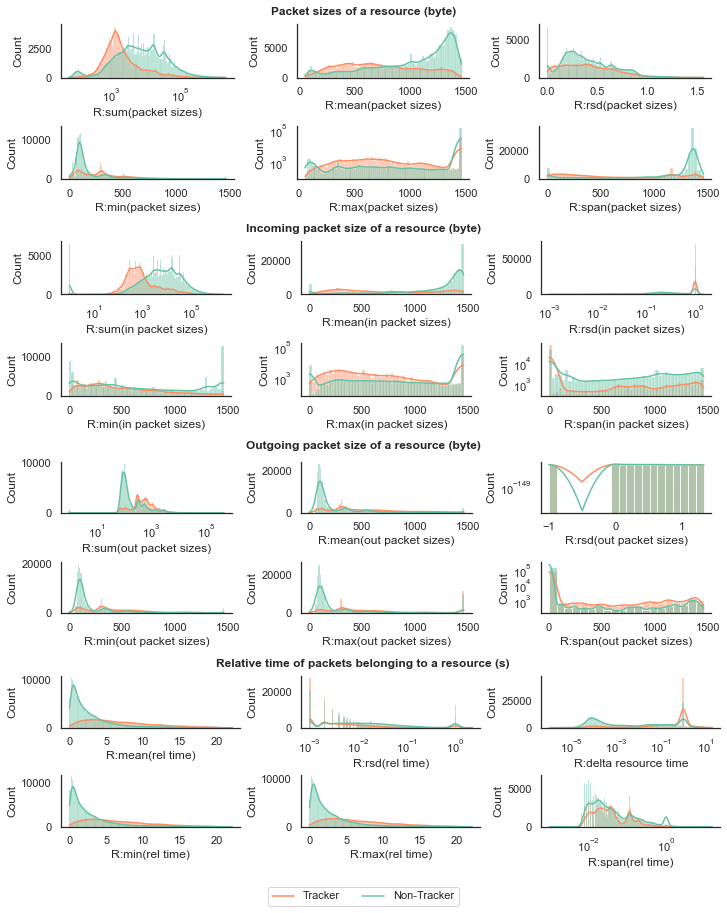

In [39]:
cols3d = [[['R:sum(packet sizes)', 'R:mean(packet sizes)', 'R:rsd(packet sizes)'],
          ['R:min(packet sizes)', 'R:max(packet sizes)', 'R:span(packet sizes)']],
          
        [['R:sum(in packet sizes)', 'R:mean(in packet sizes)', 'R:rsd(in packet sizes)'], 
         ['R:min(in packet sizes)', 'R:max(in packet sizes)', 'R:span(in packet sizes)']],
        
        [['R:sum(out packet sizes)', 'R:mean(out packet sizes)', 'R:rsd(out packet sizes)'], 
         ['R:min(out packet sizes)', 'R:max(out packet sizes)', 'R:span(out packet sizes)']],
        
        [['R:mean(rel time)', 'R:rsd(rel time)', 'R:delta resource time'], 
         ['R:min(rel time)', 'R:max(rel time)', 'R:span(rel time)']]]


fig = plt.figure(constrained_layout=True, figsize=(10,np.prod(np.asarray(cols3d).shape[:2])*1.5))
subfigs = fig.subfigures(nrows=len(cols3d), ncols=1)
titles = ["Packet sizes of a resource (byte)", "Incoming packet size of a resource (byte)", "Outgoing packet size of a resource (byte)", "Relative time of packets belonging to a resource (s)"]

xlogs = ['R:sum(packet sizes)', 'R:sum(in packet sizes)', 'R:rsd(in packet sizes)', 'R:sum(out packet sizes)', 'R:rsd(rel time)', 'R:delta resource time', 'R:span(rel time)']
ylogs = ['R:max(packet sizes)', 'R:max(in packet sizes)', 'R:span(in packet sizes)', 'R:rsd(out packet sizes)', 'R:span(out packet sizes)']  

for title, subfig, cols2d in zip(titles, subfigs, cols3d):
    subfig.suptitle(title, fontweight='bold')
    axs = subfig.subplots(len(cols2d), len(cols2d[0]))

    for i, cols1d in enumerate(cols2d):
        for ax, col in zip(axs[i], cols1d):
            if any(col == c for c in xlogs):
                sns.histplot(x=col, hue="is_tracker", data=X_resources.replace(to_replace=0, value=1), palette="Set2", kde=True, ax=ax, legend=False, log_scale=True)
            else:
                sns.histplot(x=col, hue="is_tracker", data=X_resources, palette="Set2", kde=True, ax=ax, legend=False)
             
            if any(c == col for c in ylogs):
                ax.set_yscale('log')
                
                                
fig.legend(['Tracker', 'Non-Tracker'], ncol=2, loc='lower center', bbox_to_anchor=(0.5,-0.05), bbox_transform=fig.transFigure)
fig.savefig(ASSETS / f'feature-distribution-kde{CHART_FILE_EXTENSION}', bbox_inches='tight')
plt.show()

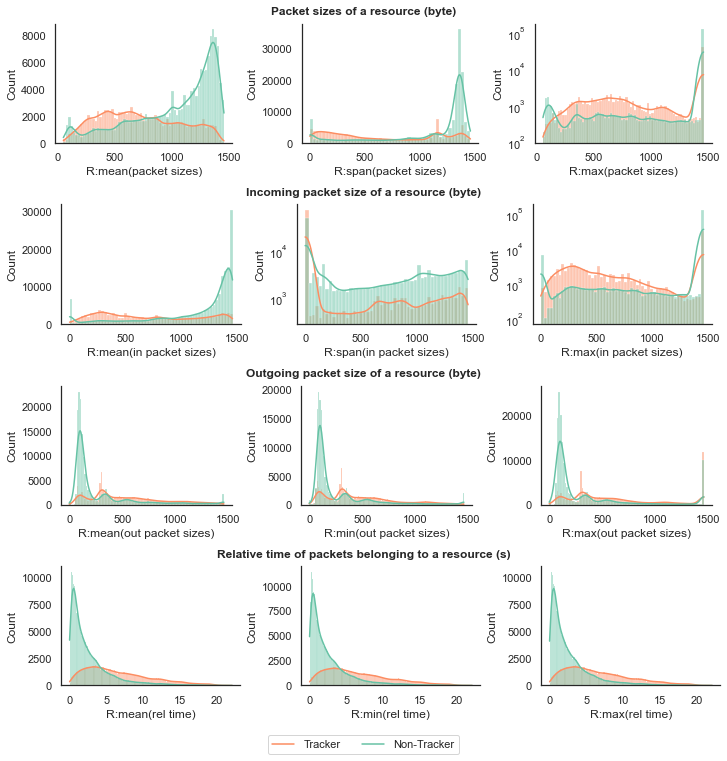

In [40]:
cols3d = [[['R:mean(packet sizes)', 'R:span(packet sizes)', 'R:max(packet sizes)']],
          
        [['R:mean(in packet sizes)', 'R:span(in packet sizes)', 'R:max(in packet sizes)']],
        
        [['R:mean(out packet sizes)', 'R:min(out packet sizes)', 'R:max(out packet sizes)']],
        
        [['R:mean(rel time)', 'R:min(rel time)', 'R:max(rel time)']]]


fig = plt.figure(constrained_layout=True, figsize=(10,np.prod(np.asarray(cols3d).shape[:2])*2.5))
subfigs = fig.subfigures(nrows=len(cols3d), ncols=1)
titles = ["Packet sizes of a resource (byte)", "Incoming packet size of a resource (byte)", "Outgoing packet size of a resource (byte)", "Relative time of packets belonging to a resource (s)"]

xlogs = []
ylogs = ['R:max(packet sizes)', 'R:max(in packet sizes)', 'R:span(in packet sizes)']
                 
for title, subfig, cols2d in zip(titles, subfigs, cols3d):
    subfig.suptitle(title, fontweight='bold')
    axs = subfig.subplots(len(cols2d), len(cols2d[0]), squeeze=False)

    for i, cols1d in enumerate(cols2d):
        for ax, col in zip(axs[i], cols1d):
            if any(col == c for c in xlogs):
                sns.histplot(x=col, hue="is_tracker", data=X_resources.replace(to_replace=0, value=1), palette="Set2", kde=True, ax=ax, legend=False, log_scale=True)
            else:
                sns.histplot(x=col, hue="is_tracker", data=X_resources, palette="Set2", kde=True, ax=ax, legend=False)
             
            if any(c == col for c in ylogs):
                ax.set_yscale('log')
                
                                
fig.legend(['Tracker', 'Non-Tracker'], ncol=2, loc='lower center', bbox_to_anchor=(0.5,-0.05), bbox_transform=fig.transFigure)
fig.savefig(ASSETS / f'feature-distribution-best-kde{CHART_FILE_EXTENSION}', bbox_inches='tight')
plt.show()

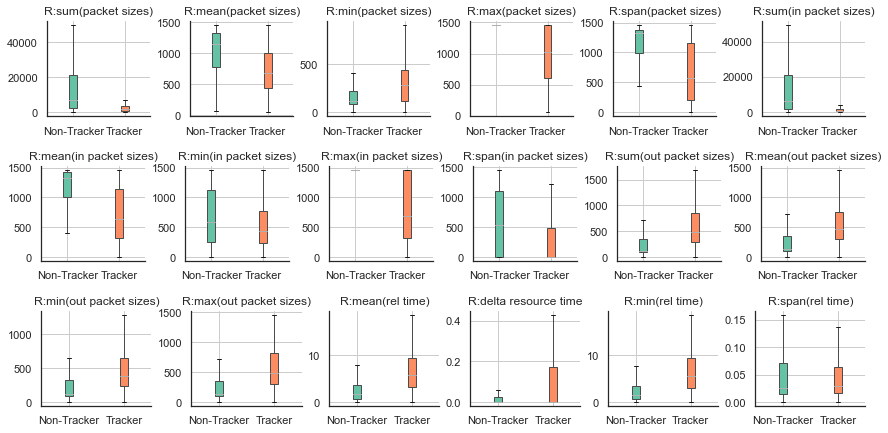

In [93]:
cols3d = [[['R:sum(packet sizes)', 'R:mean(packet sizes)', 'R:min(packet sizes)', 'R:max(packet sizes)', 'R:span(packet sizes)', 'R:sum(in packet sizes)']],
          
        [['R:mean(in packet sizes)', 'R:min(in packet sizes)', 'R:max(in packet sizes)', 'R:span(in packet sizes)', 'R:sum(out packet sizes)', 'R:mean(out packet sizes)']],
        
        [['R:min(out packet sizes)', 'R:max(out packet sizes)', 'R:mean(rel time)', 'R:delta resource time', 'R:min(rel time)', 'R:span(rel time)']]]


cols3d = np.asarray(cols3d)
shape = cols3d.shape
fig = plt.figure(constrained_layout=True, figsize=(shape[-1]*2,np.prod(shape[:2])*2))
subfigs = fig.subfigures(nrows=len(cols3d), ncols=1)
titles = ["Packet sizes of a resource (byte)", "Incoming packet size of a resource (byte)", "Outgoing packet size of a resource (byte)", "Relative time of packets belonging to a resource (s)"]

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    for title, subfig, cols2d in zip(titles, subfigs, cols3d):
        axs = subfig.subplots(len(cols2d), len(cols2d[0]), squeeze=False)

        for i, cols1d in enumerate(cols2d):
            for ax, col in zip(axs[i], cols1d):
                bp_dict = X_resources.boxplot(column=col, by='is_tracker', ax=ax, return_type='both', patch_artist=True, showfliers=False)
                subfig.suptitle("")

                for row_key, (ax,row) in bp_dict.iteritems():
                    ax.set_xlabel('')
                    ax.set_xticklabels(['Non-Tracker', 'Tracker'])
                    for i,box in enumerate(row['boxes']):
                        box.set_facecolor(color_cycle[i])
                
fig.savefig(ASSETS / f'boxplot-all-resource-features{CHART_FILE_EXTENSION}', bbox_inches='tight')

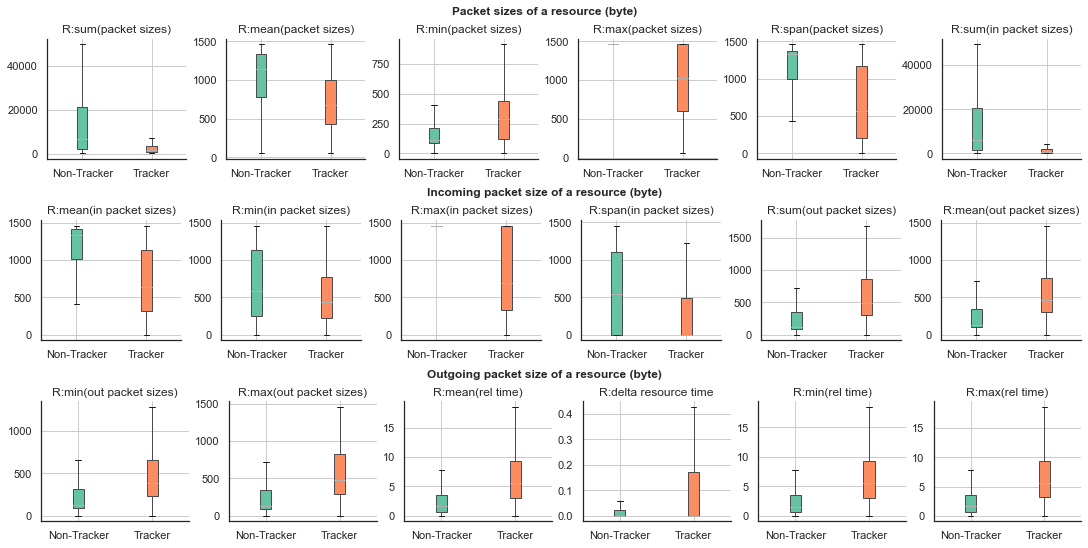

In [76]:
cols3d = [[['R:sum(packet sizes)', 'R:mean(packet sizes)', 'R:rsd(packet sizes)', 'R:min(packet sizes)', 'R:max(packet sizes)', 'R:span(packet sizes)']],
          
        [['R:sum(in packet sizes)', 'R:mean(in packet sizes)', 'R:rsd(in packet sizes)', 'R:min(in packet sizes)', 'R:max(in packet sizes)', 'R:span(in packet sizes)']],
        
        [['R:sum(out packet sizes)', 'R:mean(out packet sizes)', 'R:rsd(out packet sizes)', 'R:min(out packet sizes)', 'R:max(out packet sizes)', 'R:span(out packet sizes)']],
        
        [['R:mean(rel time)', 'R:rsd(rel time)', 'R:delta resource time', 'R:min(rel time)', 'R:max(rel time)', 'R:span(rel time)']]]

cols3d = np.asarray(cols3d)
shape = cols3d.shape
fig = plt.figure(constrained_layout=True, figsize=(shape[-1]*2.5,np.prod(shape[:2])*2.5))
subfigs = fig.subfigures(nrows=len(cols3d), ncols=1)
titles = ["Packet sizes of a resource (byte)", "Incoming packet size of a resource (byte)", "Outgoing packet size of a resource (byte)", "Relative time of packets belonging to a resource (s)"]

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    for title, subfig, cols2d in zip(titles, subfigs, cols3d):
        axs = subfig.subplots(len(cols2d), len(cols2d[0]), squeeze=False)

        for i, cols1d in enumerate(cols2d):
            for ax, col in zip(axs[i], cols1d):
                bp_dict = X_resources.boxplot(column=col, by='is_tracker', ax=ax, return_type='both', patch_artist=True, showfliers=False)
                subfig.suptitle(title, fontweight='bold')

                for row_key, (ax,row) in bp_dict.iteritems():
                    ax.set_xlabel('')
                    ax.set_xticklabels(['Non-Tracker', 'Tracker'])
                    for i,box in enumerate(row['boxes']):
                        box.set_facecolor(color_cycle[i])
                
fig.savefig(ASSETS / f'boxplot-all-resource-features{CHART_FILE_EXTENSION}', bbox_inches='tight')

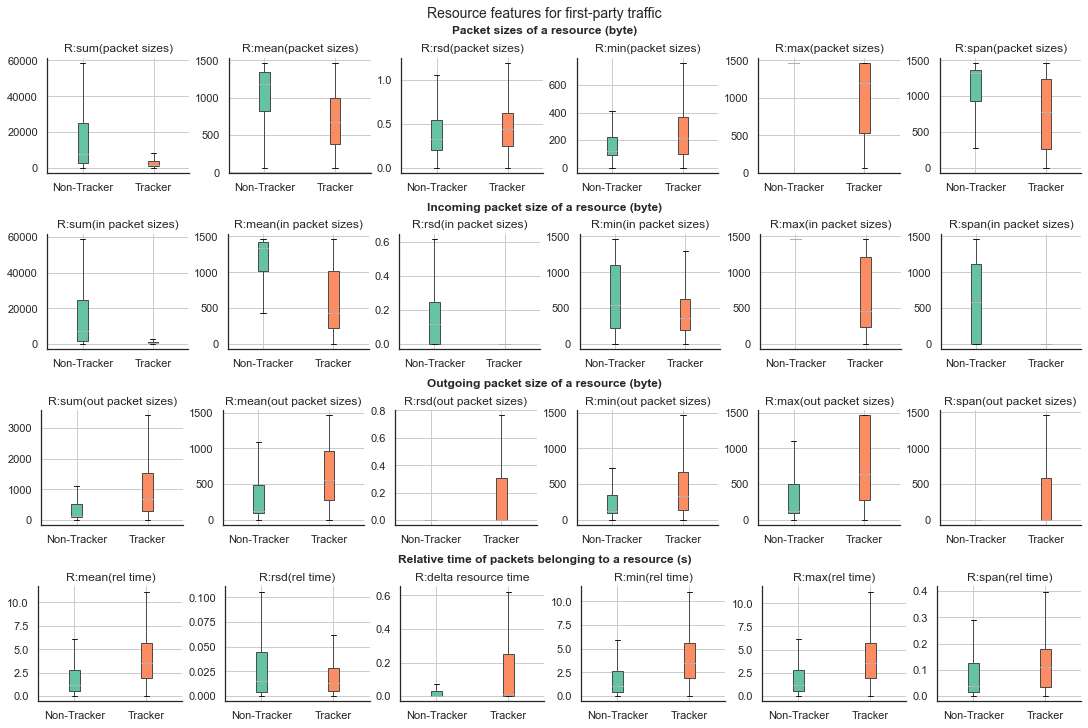

In [42]:
cols3d = [[['R:sum(packet sizes)', 'R:mean(packet sizes)', 'R:rsd(packet sizes)', 'R:min(packet sizes)', 'R:max(packet sizes)', 'R:span(packet sizes)']],
          
        [['R:sum(in packet sizes)', 'R:mean(in packet sizes)', 'R:rsd(in packet sizes)', 'R:min(in packet sizes)', 'R:max(in packet sizes)', 'R:span(in packet sizes)']],
        
        [['R:sum(out packet sizes)', 'R:mean(out packet sizes)', 'R:rsd(out packet sizes)', 'R:min(out packet sizes)', 'R:max(out packet sizes)', 'R:span(out packet sizes)']],
        
        [['R:mean(rel time)', 'R:rsd(rel time)', 'R:delta resource time', 'R:min(rel time)', 'R:max(rel time)', 'R:span(rel time)']]]


cols3d = np.asarray(cols3d)
shape = cols3d.shape
fig = plt.figure(constrained_layout=True, figsize=(shape[-1]*2.5,np.prod(shape[:2])*2.5))
subfigs = fig.subfigures(nrows=len(cols3d), ncols=1)
titles = ["Packet sizes of a resource (byte)", "Incoming packet size of a resource (byte)", "Outgoing packet size of a resource (byte)", "Relative time of packets belonging to a resource (s)"]

first_parties = resources.query("~is_tp").index
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    for title, subfig, cols2d in zip(titles, subfigs, cols3d):
        axs = subfig.subplots(len(cols2d), len(cols2d[0]), squeeze=False)

        for i, cols1d in enumerate(cols2d):
            for ax, col in zip(axs[i], cols1d):
                bp_dict = X_resources.loc[first_parties].boxplot(column=col, by='is_tracker', ax=ax, return_type='both', patch_artist=True, showfliers=False)
                subfig.suptitle(title, fontweight='bold')

                for row_key, (ax,row) in bp_dict.iteritems():
                    ax.set_xlabel('')
                    ax.set_xticklabels(['Non-Tracker', 'Tracker'])
                    for i,box in enumerate(row['boxes']):
                        box.set_facecolor(color_cycle[i])
                
fig.suptitle("Resource features for first-party traffic", fontsize=14)
fig.savefig(ASSETS / f'boxplot-all-resource-features-first-party{CHART_FILE_EXTENSION}', bbox_inches='tight')

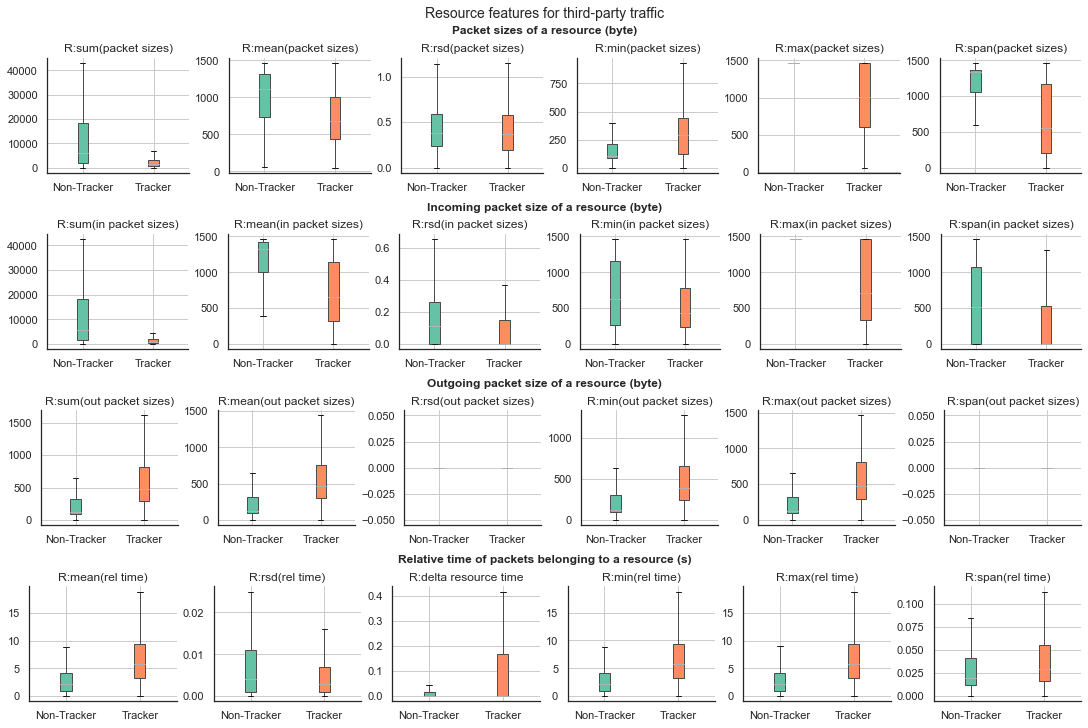

In [43]:
cols3d = [[['R:sum(packet sizes)', 'R:mean(packet sizes)', 'R:rsd(packet sizes)', 'R:min(packet sizes)', 'R:max(packet sizes)', 'R:span(packet sizes)']],
          
        [['R:sum(in packet sizes)', 'R:mean(in packet sizes)', 'R:rsd(in packet sizes)', 'R:min(in packet sizes)', 'R:max(in packet sizes)', 'R:span(in packet sizes)']],
        
        [['R:sum(out packet sizes)', 'R:mean(out packet sizes)', 'R:rsd(out packet sizes)', 'R:min(out packet sizes)', 'R:max(out packet sizes)', 'R:span(out packet sizes)']],
        
        [['R:mean(rel time)', 'R:rsd(rel time)', 'R:delta resource time', 'R:min(rel time)', 'R:max(rel time)', 'R:span(rel time)']]]


cols3d = np.asarray(cols3d)
shape = cols3d.shape
fig = plt.figure(constrained_layout=True, figsize=(shape[-1]*2.5,np.prod(shape[:2])*2.5))
subfigs = fig.subfigures(nrows=len(cols3d), ncols=1)
titles = ["Packet sizes of a resource (byte)", "Incoming packet size of a resource (byte)", "Outgoing packet size of a resource (byte)", "Relative time of packets belonging to a resource (s)"]

third_parties = resources.query("is_tp").index
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    for title, subfig, cols2d in zip(titles, subfigs, cols3d):
        axs = subfig.subplots(len(cols2d), len(cols2d[0]), squeeze=False)

        for i, cols1d in enumerate(cols2d):
            for ax, col in zip(axs[i], cols1d):
                bp_dict = X_resources.loc[third_parties].boxplot(column=col, by='is_tracker', ax=ax, return_type='both', patch_artist=True, showfliers=False)
                subfig.suptitle(title, fontweight='bold')

                for row_key, (ax,row) in bp_dict.iteritems():
                    ax.set_xlabel('')
                    ax.set_xticklabels(['Non-Tracker', 'Tracker'])
                    for i,box in enumerate(row['boxes']):
                        box.set_facecolor(color_cycle[i])
                
fig.suptitle("Resource features for third-party traffic", fontsize=14)
fig.savefig(ASSETS / f'boxplot-all-resource-features-third-party{CHART_FILE_EXTENSION}', bbox_inches='tight')

Text(0.5, 0.98, 'Resource features for font traffic')

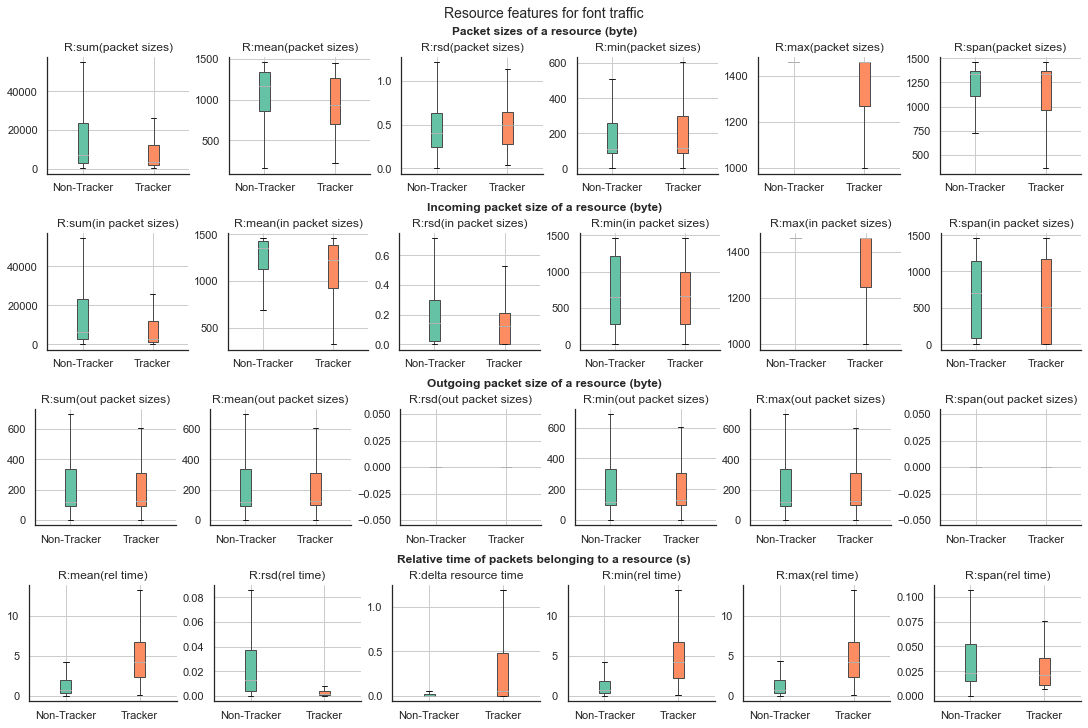

In [44]:
cols3d = [[['R:sum(packet sizes)', 'R:mean(packet sizes)', 'R:rsd(packet sizes)', 'R:min(packet sizes)', 'R:max(packet sizes)', 'R:span(packet sizes)']],
          
        [['R:sum(in packet sizes)', 'R:mean(in packet sizes)', 'R:rsd(in packet sizes)', 'R:min(in packet sizes)', 'R:max(in packet sizes)', 'R:span(in packet sizes)']],
        
        [['R:sum(out packet sizes)', 'R:mean(out packet sizes)', 'R:rsd(out packet sizes)', 'R:min(out packet sizes)', 'R:max(out packet sizes)', 'R:span(out packet sizes)']],
        
        [['R:mean(rel time)', 'R:rsd(rel time)', 'R:delta resource time', 'R:min(rel time)', 'R:max(rel time)', 'R:span(rel time)']]]


cols3d = np.asarray(cols3d)
shape = cols3d.shape
fig = plt.figure(constrained_layout=True, figsize=(shape[-1]*2.5,np.prod(shape[:2])*2.5))
subfigs = fig.subfigures(nrows=len(cols3d), ncols=1)
titles = ["Packet sizes of a resource (byte)", "Incoming packet size of a resource (byte)", "Outgoing packet size of a resource (byte)", "Relative time of packets belonging to a resource (s)"]

third_parties = resources.query("is_tp").index
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    for title, subfig, cols2d in zip(titles, subfigs, cols3d):
        axs = subfig.subplots(len(cols2d), len(cols2d[0]), squeeze=False)

        for i, cols1d in enumerate(cols2d):
            for ax, col in zip(axs[i], cols1d):
                bp_dict = X_resources.loc[resources.query("type == 'stylesheet' | type == 'media' | type == 'font'").index].boxplot(column=col, by='is_tracker', ax=ax, return_type='both', patch_artist=True, showfliers=False)
                subfig.suptitle(title, fontweight='bold')

                for row_key, (ax,row) in bp_dict.iteritems():
                    ax.set_xlabel('')
                    ax.set_xticklabels(['Non-Tracker', 'Tracker'])
                    for i,box in enumerate(row['boxes']):
                        box.set_facecolor(color_cycle[i])
                
fig.suptitle("Resource features for font traffic", fontsize=14)
#fig.savefig(ASSETS / f'boxplot-all-resource-features-third-party{CHART_FILE_EXTENSION}', bbox_inches='tight')

/var/folders/8x/qb0cq8pd4rq7vy5qvfc3_2vr0000gn/T/ipykernel_59328/3234426905.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row_key, (ax,row) in bp_dict.iteritems():
/var/folders/8x/qb0cq8pd4rq7vy5qvfc3_2vr0000gn/T/ipykernel_59328/3234426905.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row_key, (ax,row) in bp_dict.iteritems():
/var/folders/8x/qb0cq8pd4rq7vy5qvfc3_2vr0000gn/T/ipykernel_59328/3234426905.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row_key, (ax,row) in bp_dict.iteritems():
/var/folders/8x/qb0cq8pd4rq7vy5qvfc3_2vr0000gn/T/ipykernel_59328/3234426905.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row_key, (ax,row) in bp_dict.iteritems():


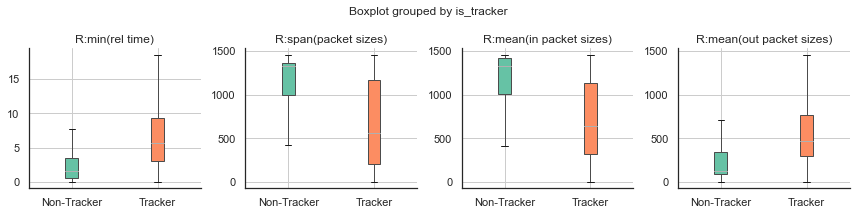

In [45]:
cols = ['R:min(rel time)', 'R:span(packet sizes)', 'R:mean(in packet sizes)', 'R:mean(out packet sizes)']
fig, axs = plt.subplots(1, len(cols), figsize=(3*len(cols),3))

for ax, col in zip(axs, cols):
    bp_dict = X_resources.boxplot(column=col, by='is_tracker', ax=ax, return_type='both', patch_artist=True, showfliers=False)

    for row_key, (ax,row) in bp_dict.iteritems():
        ax.set_xlabel('')
        ax.set_xticklabels(['Non-Tracker', 'Tracker'])
        for i,box in enumerate(row['boxes']):
            box.set_facecolor(color_cycle[i])
        
fig.tight_layout()
fig.savefig(ASSETS / f'boxplot-best-features{CHART_FILE_EXTENSION}')

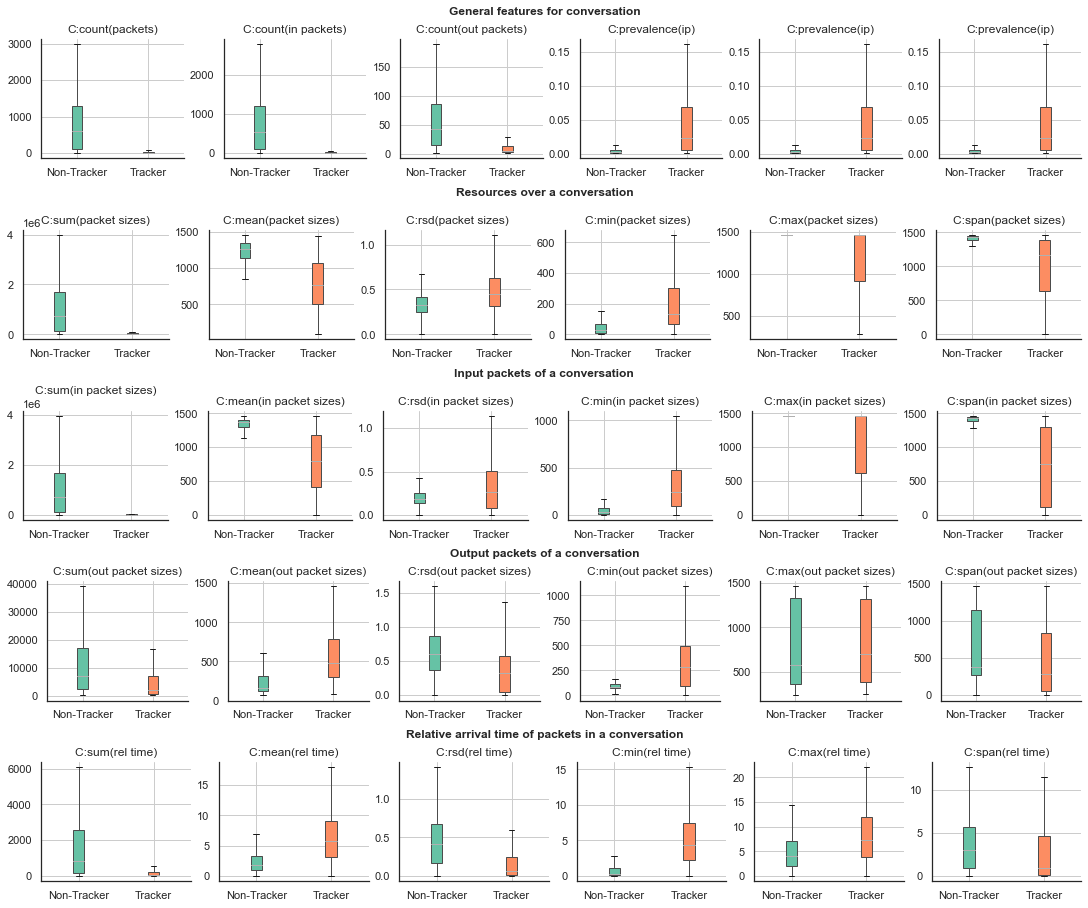

In [46]:
cols3d = [[['C:count(packets)', 'C:count(in packets)', 'C:count(out packets)', 'C:prevalence(ip)', 'C:prevalence(ip)', 'C:prevalence(ip)']],
          
        [['C:sum(packet sizes)', 'C:mean(packet sizes)', 'C:rsd(packet sizes)', 'C:min(packet sizes)', 'C:max(packet sizes)', 'C:span(packet sizes)']],
          
        [['C:sum(in packet sizes)', 'C:mean(in packet sizes)', 'C:rsd(in packet sizes)', 'C:min(in packet sizes)', 'C:max(in packet sizes)', 'C:span(in packet sizes)']],
        
        [['C:sum(out packet sizes)', 'C:mean(out packet sizes)', 'C:rsd(out packet sizes)', 'C:min(out packet sizes)', 'C:max(out packet sizes)', 'C:span(out packet sizes)']],
        
        [['C:sum(rel time)', 'C:mean(rel time)', 'C:rsd(rel time)', 'C:min(rel time)', 'C:max(rel time)', 'C:span(rel time)']]]


cols3d = np.asarray(cols3d)
shape = cols3d.shape
fig = plt.figure(constrained_layout=True, figsize=(shape[-1]*2.5,np.prod(shape[:2])*2.5))
subfigs = fig.subfigures(nrows=len(cols3d), ncols=1)
titles = ["General features for conversation", "Resources over a conversation", "Input packets of a conversation", "Output packets of a conversation", "Relative arrival time of packets in a conversation"]

for title, subfig, cols2d in zip(titles, subfigs, cols3d):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        axs = subfig.subplots(len(cols2d), len(cols2d[0]), squeeze=False)

        for i, cols1d in enumerate(cols2d):
            for ax, col in zip(axs[i], cols1d):
                bp_dict = X_resources.boxplot(column=col, by='is_tracker', ax=ax, return_type='both', patch_artist=True, showfliers=False)
                subfig.suptitle(title, fontweight='bold')

                for row_key, (ax,row) in bp_dict.iteritems():
                    ax.set_xlabel('')
                    ax.set_xticklabels(['Non-Tracker', 'Tracker'])
                    for i,box in enumerate(row['boxes']):
                        box.set_facecolor(color_cycle[i])
                
fig.savefig(ASSETS / f'boxplot-all-communication-features{CHART_FILE_EXTENSION}', bbox_inches='tight')

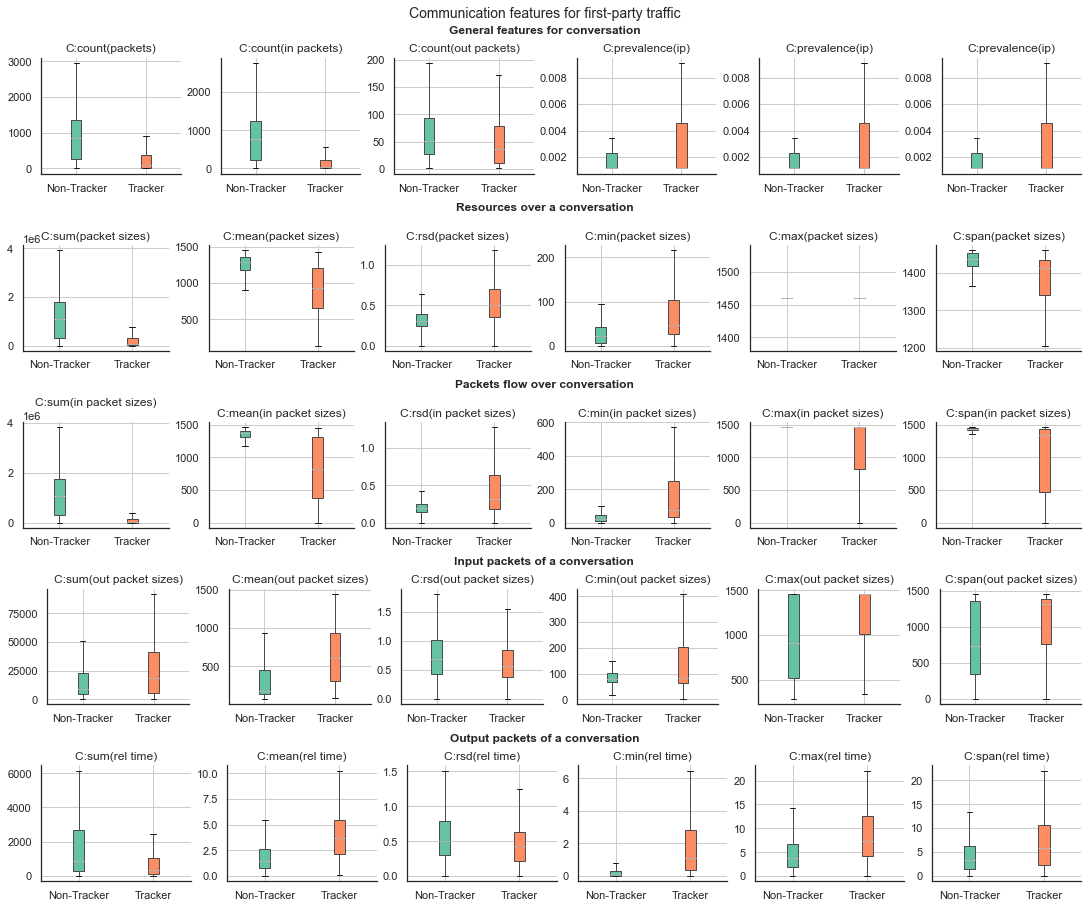

In [47]:
cols3d = [[['C:count(packets)', 'C:count(in packets)', 'C:count(out packets)', 'C:prevalence(ip)', 'C:prevalence(ip)', 'C:prevalence(ip)']],
          
        [['C:sum(packet sizes)', 'C:mean(packet sizes)', 'C:rsd(packet sizes)', 'C:min(packet sizes)', 'C:max(packet sizes)', 'C:span(packet sizes)']],
          
        [['C:sum(in packet sizes)', 'C:mean(in packet sizes)', 'C:rsd(in packet sizes)', 'C:min(in packet sizes)', 'C:max(in packet sizes)', 'C:span(in packet sizes)']],
        
        [['C:sum(out packet sizes)', 'C:mean(out packet sizes)', 'C:rsd(out packet sizes)', 'C:min(out packet sizes)', 'C:max(out packet sizes)', 'C:span(out packet sizes)']],
        
        [['C:sum(rel time)', 'C:mean(rel time)', 'C:rsd(rel time)', 'C:min(rel time)', 'C:max(rel time)', 'C:span(rel time)']]]


cols3d = np.asarray(cols3d)
shape = cols3d.shape
fig = plt.figure(constrained_layout=True, figsize=(shape[-1]*2.5,np.prod(shape[:2])*2.5))
subfigs = fig.subfigures(nrows=len(cols3d), ncols=1)
titles = ["General features for conversation", "Resources over a conversation", "Packets flow over conversation", "Input packets of a conversation", "Output packets of a conversation", "Relative arrival time of packets in a conversation"]

first_parties = resources.query("~is_tp").index
for title, subfig, cols2d in zip(titles, subfigs, cols3d):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        axs = subfig.subplots(len(cols2d), len(cols2d[0]), squeeze=False)

        for i, cols1d in enumerate(cols2d):
            for ax, col in zip(axs[i], cols1d):
                bp_dict = X_resources.loc[first_parties].boxplot(column=col, by='is_tracker', ax=ax, return_type='both', patch_artist=True, showfliers=False)
                subfig.suptitle(title, fontweight='bold')

                for row_key, (ax,row) in bp_dict.iteritems():
                    ax.set_xlabel('')
                    ax.set_xticklabels(['Non-Tracker', 'Tracker'])
                    for i,box in enumerate(row['boxes']):
                        box.set_facecolor(color_cycle[i])
                
fig.suptitle("Communication features for first-party traffic", fontsize=14)
fig.savefig(ASSETS / f'boxplot-all-communication-features-first-party{CHART_FILE_EXTENSION}', bbox_inches='tight')

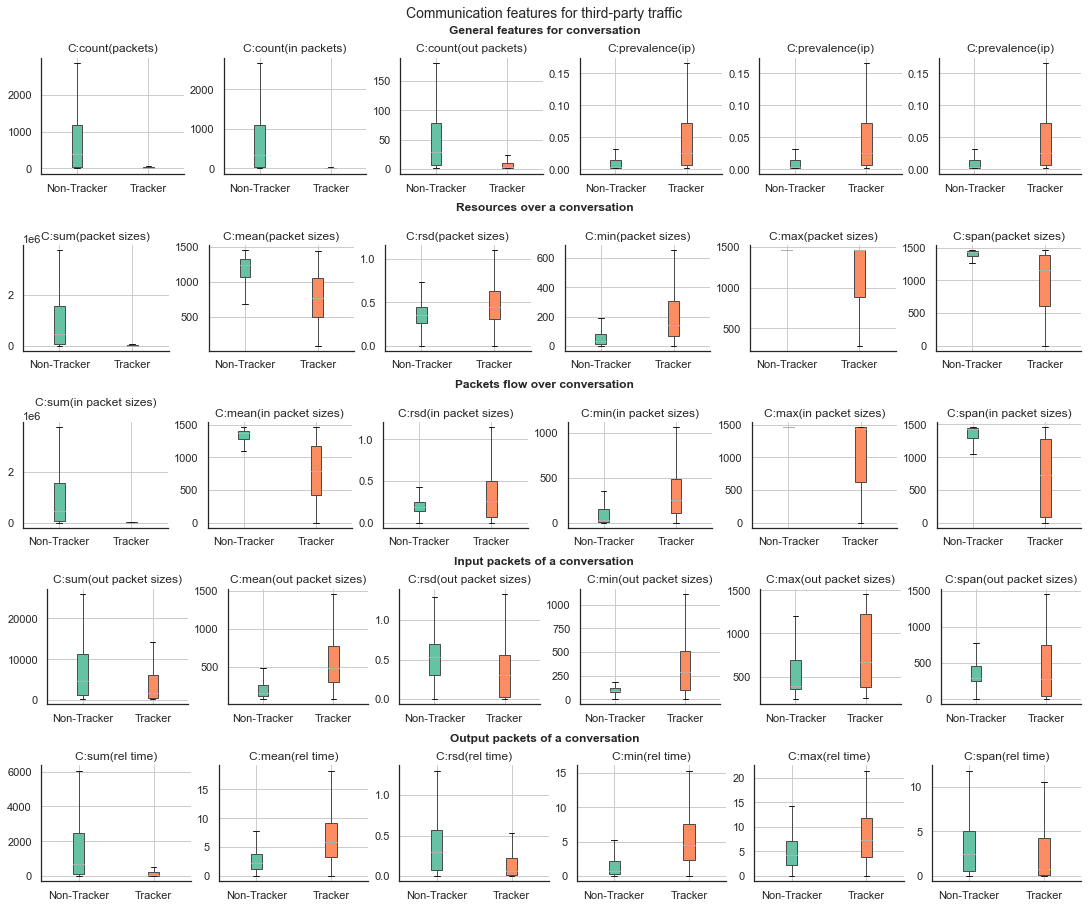

In [48]:
cols3d = [[['C:count(packets)', 'C:count(in packets)', 'C:count(out packets)', 'C:prevalence(ip)', 'C:prevalence(ip)', 'C:prevalence(ip)']],
          
        [['C:sum(packet sizes)', 'C:mean(packet sizes)', 'C:rsd(packet sizes)', 'C:min(packet sizes)', 'C:max(packet sizes)', 'C:span(packet sizes)']],
          
        [['C:sum(in packet sizes)', 'C:mean(in packet sizes)', 'C:rsd(in packet sizes)', 'C:min(in packet sizes)', 'C:max(in packet sizes)', 'C:span(in packet sizes)']],
        
        [['C:sum(out packet sizes)', 'C:mean(out packet sizes)', 'C:rsd(out packet sizes)', 'C:min(out packet sizes)', 'C:max(out packet sizes)', 'C:span(out packet sizes)']],
        
        [['C:sum(rel time)', 'C:mean(rel time)', 'C:rsd(rel time)', 'C:min(rel time)', 'C:max(rel time)', 'C:span(rel time)']]]


cols3d = np.asarray(cols3d)
shape = cols3d.shape
fig = plt.figure(constrained_layout=True, figsize=(shape[-1]*2.5,np.prod(shape[:2])*2.5))
subfigs = fig.subfigures(nrows=len(cols3d), ncols=1)
titles = ["General features for conversation", "Resources over a conversation", "Packets flow over conversation", "Input packets of a conversation", "Output packets of a conversation", "Relative arrival time of packets in a conversation"]

third_parties = resources.query("is_tp").index
for title, subfig, cols2d in zip(titles, subfigs, cols3d):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        axs = subfig.subplots(len(cols2d), len(cols2d[0]), squeeze=False)

        for i, cols1d in enumerate(cols2d):
            for ax, col in zip(axs[i], cols1d):
                bp_dict = X_resources.loc[third_parties].boxplot(column=col, by='is_tracker', ax=ax, return_type='both', patch_artist=True, showfliers=False)
                subfig.suptitle(title, fontweight='bold')

                for row_key, (ax,row) in bp_dict.iteritems():
                    ax.set_xlabel('')
                    ax.set_xticklabels(['Non-Tracker', 'Tracker'])
                    for i,box in enumerate(row['boxes']):
                        box.set_facecolor(color_cycle[i])
                
fig.suptitle("Communication features for third-party traffic", fontsize=14)
fig.savefig(ASSETS / f'boxplot-all-communication-features-third-party{CHART_FILE_EXTENSION}', bbox_inches='tight')

Text(0.5, 0.98, 'Communication features for font traffic')

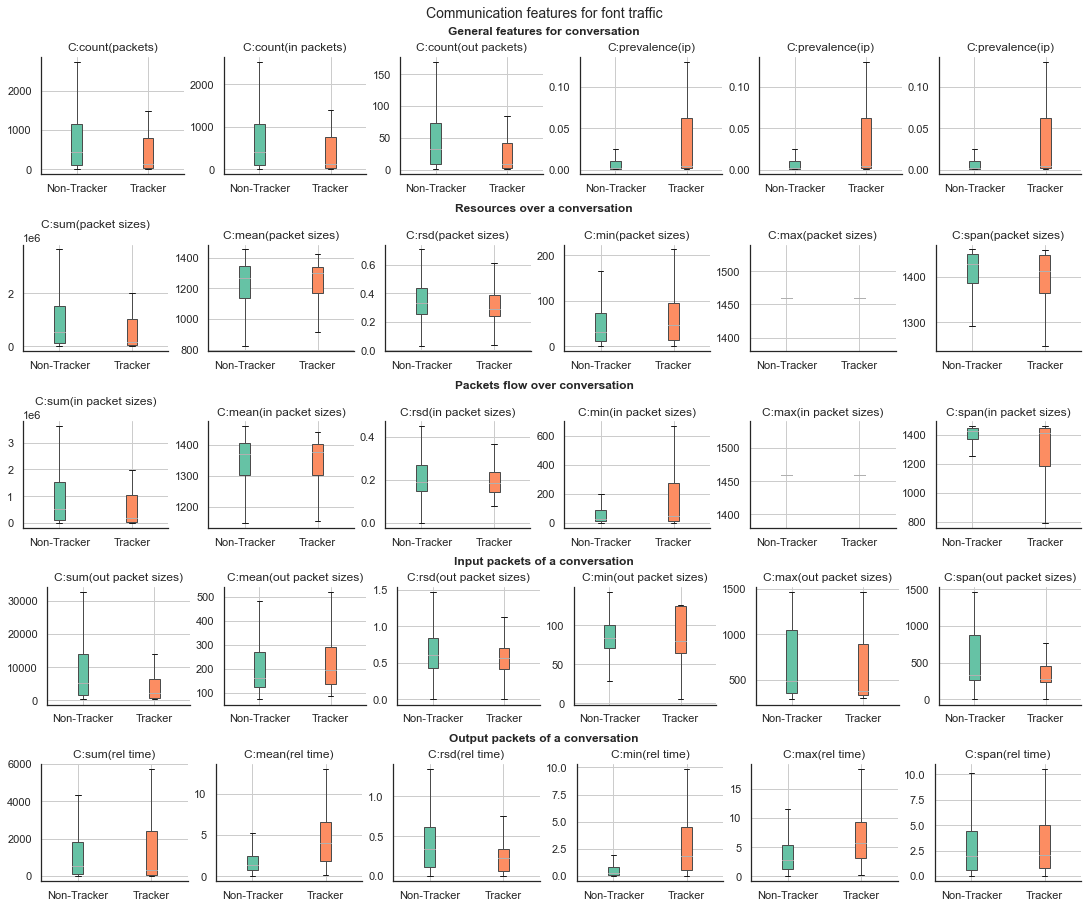

In [49]:
cols3d = [[['C:count(packets)', 'C:count(in packets)', 'C:count(out packets)', 'C:prevalence(ip)', 'C:prevalence(ip)', 'C:prevalence(ip)']],
          
        [['C:sum(packet sizes)', 'C:mean(packet sizes)', 'C:rsd(packet sizes)', 'C:min(packet sizes)', 'C:max(packet sizes)', 'C:span(packet sizes)']],
          
        [['C:sum(in packet sizes)', 'C:mean(in packet sizes)', 'C:rsd(in packet sizes)', 'C:min(in packet sizes)', 'C:max(in packet sizes)', 'C:span(in packet sizes)']],
        
        [['C:sum(out packet sizes)', 'C:mean(out packet sizes)', 'C:rsd(out packet sizes)', 'C:min(out packet sizes)', 'C:max(out packet sizes)', 'C:span(out packet sizes)']],
        
        [['C:sum(rel time)', 'C:mean(rel time)', 'C:rsd(rel time)', 'C:min(rel time)', 'C:max(rel time)', 'C:span(rel time)']]]


cols3d = np.asarray(cols3d)
shape = cols3d.shape
fig = plt.figure(constrained_layout=True, figsize=(shape[-1]*2.5,np.prod(shape[:2])*2.5))
subfigs = fig.subfigures(nrows=len(cols3d), ncols=1)
titles = ["General features for conversation", "Resources over a conversation", "Packets flow over conversation", "Input packets of a conversation", "Output packets of a conversation", "Relative arrival time of packets in a conversation"]

third_parties = resources.query("is_tp").index
for title, subfig, cols2d in zip(titles, subfigs, cols3d):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        axs = subfig.subplots(len(cols2d), len(cols2d[0]), squeeze=False)

        for i, cols1d in enumerate(cols2d):
            for ax, col in zip(axs[i], cols1d):
                bp_dict = X_resources.loc[resources.query("type == 'stylesheet' | type == 'media' | type == 'font'").index].boxplot(column=col, by='is_tracker', ax=ax, return_type='both', patch_artist=True, showfliers=False)
                subfig.suptitle(title, fontweight='bold')

                for row_key, (ax,row) in bp_dict.iteritems():
                    ax.set_xlabel('')
                    ax.set_xticklabels(['Non-Tracker', 'Tracker'])
                    for i,box in enumerate(row['boxes']):
                        box.set_facecolor(color_cycle[i])
                
fig.suptitle("Communication features for font traffic", fontsize=14)
#fig.savefig(ASSETS / f'boxplot-all-communication-features-third-party{CHART_FILE_EXTENSION}', bbox_inches='tight')

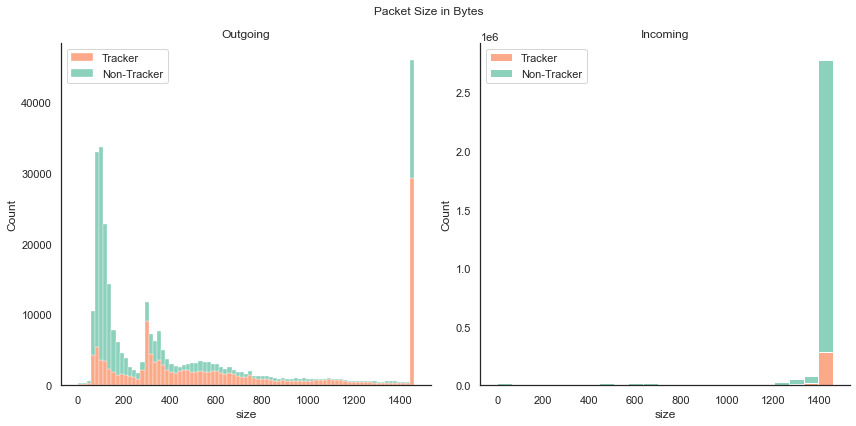

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))
for is_req, gp in  packets.groupby('is_out'):
    l = "Outgoing" if is_req else "Incoming"
    ax = axs[0] if is_req else axs[1]
    sns.histplot(x="size", hue="is_tracker", data=gp, palette="Set2", multiple="stack", ax=ax, label=l)
    ax.set_title(l)
    ax.legend(['Tracker', 'Non-Tracker'])

fig.suptitle("Packet Size in Bytes")
fig.tight_layout()
plt.savefig(ASSETS / f'packet-size-by-tracker{CHART_FILE_EXTENSION}')
plt.show()

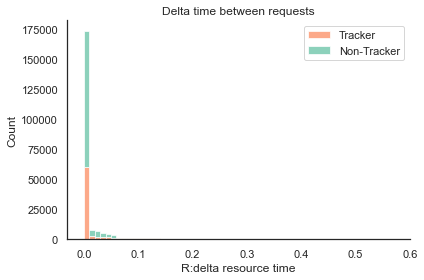

In [51]:
sns.histplot(x='R:delta resource time', hue='is_tracker', data=X_resources_wo, palette="Set2", multiple="stack", binwidth=.01)
plt.xlim(-0.03, 0.6)
plt.legend(['Tracker', 'Non-Tracker'])
plt.title("Delta time between requests")
plt.tight_layout()
plt.savefig(ASSETS / f'delta-time-between-requests-by-tracker{CHART_FILE_EXTENSION}')
plt.show()

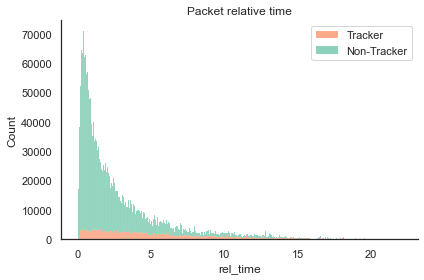

In [52]:
sns.histplot(x='rel_time', hue='is_tracker', data=packets, palette="Set2", multiple="stack")
plt.legend(['Tracker', 'Non-Tracker'])
plt.title("Packet relative time")
plt.tight_layout()
plt.savefig(ASSETS / f'packet-rel-time-by-tracker{CHART_FILE_EXTENSION}')
plt.show()

In [53]:
packets.groupby('study_name')['rel_time'].max()

study_name
accepting policy    20.62302
after accept        22.08920
before accept       20.03062
Name: rel_time, dtype: float64

### Hypothesis testing

#### Resource level

In [54]:
def ttest(a, b, niveau=0.05, alt='two-sided'):
    if len(a) <= 30 or len(b) <= 30:
        print("Sample size is smaller than 30, test for normal distribution with shapiro test")
        a_norm = stats.shapiro(a)
        b_norm = stats.shapiro(b)
        if a_norm.pvalue < niveau:
            print(f"Samle {a.name} is not normal distributed")
            return None
        if b_norm.pvalue < niveau:
            print(f"Samle {b.name} is not normal distributed")
            return None
        
    var_hom = stats.levene(a, b).pvalue >= niveau
    ttest = stats.ttest_ind(a, b, equal_var=var_hom, alternative=alt)
    
    return ttest, var_hom
            

test_results = {}
for col in X_resources.columns[:-1]:
    g1 = X_resources[X_resources['is_tracker']][col]
    g2 = X_resources[~X_resources['is_tracker']][col]
    
    res = {'var_diff': g1.var() / g2.var()}
    for alt in ['two-sided', 'less', 'greater']:
        t, var_hom = ttest(g1, g2, alt=alt)
        res['var_hom'] = var_hom
        if t is not None:
            res[alt] = t.pvalue
        else:
            res[alt] = None
    
    test_results[col] = res

print("G1[is_tracker] vs. G2[not is_tracker]: less means g1 < g2, greater means g1 > g2")
hyp = pd.DataFrame(test_results).T
display(hyp.head())
hyp.query("(less > 0.01 & less < 0.999) | (greater > 0.01 & greater < 0.999)")

G1[is_tracker] vs. G2[not is_tracker]: less means g1 < g2, greater means g1 > g2


,var_diff,var_hom,two-sided,less,greater
C:count(packets),0.043902,False,0.0,0.0,1.0
C:count(in packets),0.042899,False,0.0,0.0,1.0
C:count(out packets),0.116993,False,0.0,0.0,1.0
C:sum(packet sizes),0.044427,False,0.0,0.0,1.0
C:mean(packet sizes),1.91573,False,0.0,0.0,1.0


,var_diff,var_hom,two-sided,less,greater


### Korrelation

#### Cramer's V

In [55]:
from scipy.stats.contingency import association, chi2_contingency

#cramer = pd.DataFrame({col: [association(pd.crosstab(index=X_resources[col],columns=X_resources['is_tracker']),correction=True),
#                             chi2_contingency(pd.crosstab(index=X_resources[col],columns=X_resources['is_tracker']),correction=False)[1]]
#          for col in ['C:enc(ip)', 'C:ip[0]', 'C:ip[1]', 'C:ip[2]', 'C:ip[3]', 'C:enc(org)']}, index=['cramersv', 'pval']).T
#cramer

#### Punktbiseriale Korrelation

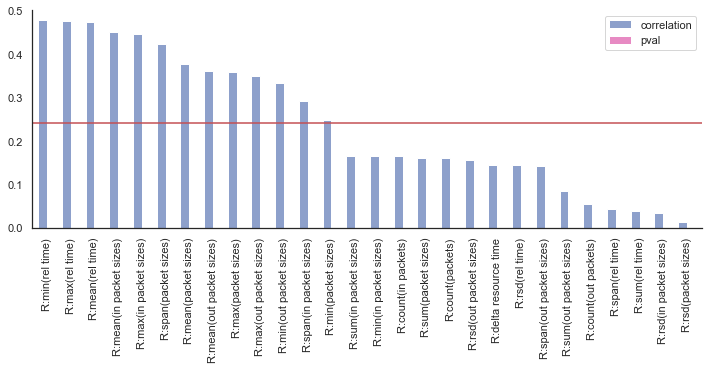

In [75]:
correlation = {col: stats.pointbiserialr(X_resources[col], X_resources['is_tracker']) for col in X_resources.columns[:-1]}
correlation = pd.DataFrame(correlation).T
correlation.columns = ['correlation', 'pval']
correlation['correlation'] = correlation['correlation'].abs()
correlation = correlation.loc[[col for col in X_resources.columns if col.startswith('R:')]]
correlation = correlation.sort_values(by='correlation', ascending=False)

ax = correlation.plot.bar(color=color_cycle[2:], width=bar_width, figsize=(12,4))
ax.axhline(correlation['correlation'].mean(), color='r')
ax.axhline(0, linewidth=0.8, color='k')

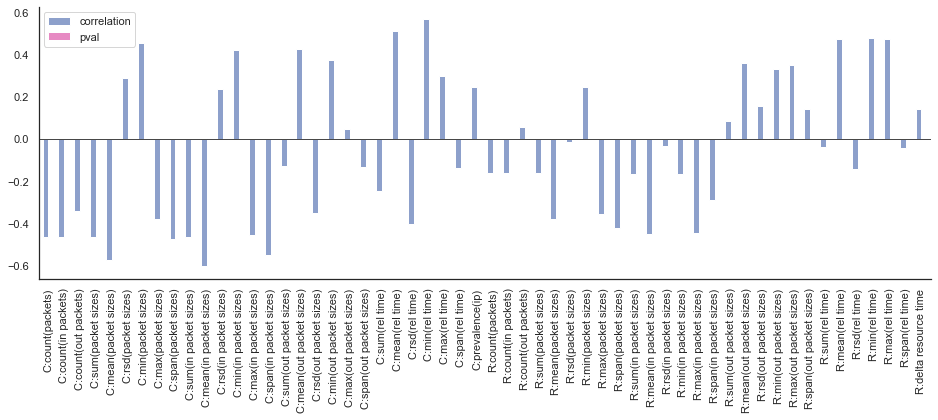

In [115]:
correlation = {col: stats.pointbiserialr(X_resources[col], X_resources['is_tracker']) for col in X_resources.columns[:-1]}
correlation = pd.DataFrame(correlation).T
correlation.columns = ['correlation', 'pval']
#correlation['correlation'] = correlation['correlation'].abs()
#correlation = correlation.sort_values(by='correlation', ascending=False)
ax = correlation.plot.bar(color=color_cycle[2:], width=bar_width, figsize=(16,5))
#ax.axhline(correlation['correlation'].mean(), color='r')
ax.axhline(0, linewidth=0.8, color='k')

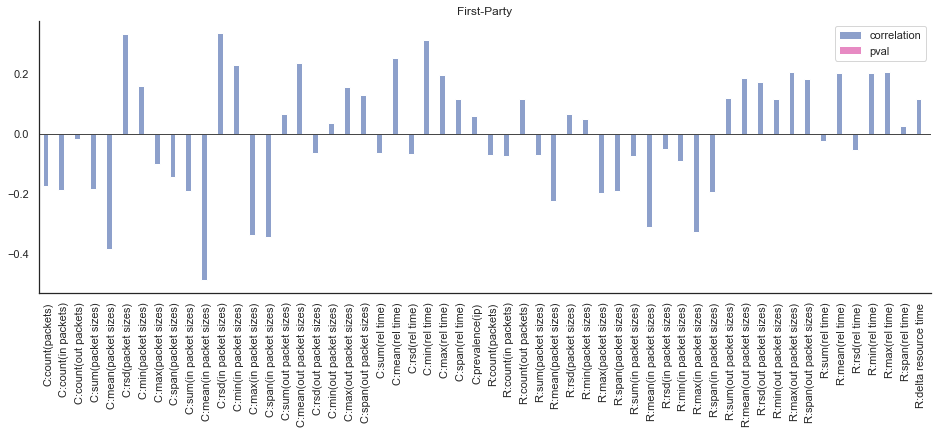

In [57]:
correlation = {col: stats.pointbiserialr(X_resources.loc[first_parties][col], resources.loc[first_parties]['is_tracker']) for col in X_resources.columns[:-1]}
correlation = pd.DataFrame(correlation).T
correlation.columns = ['correlation', 'pval']
#correlation['correlation'] = correlation['correlation'].abs()
#correlation = correlation.sort_values(by='correlation', ascending=False)
ax = correlation.plot.bar(color=color_cycle[2:], width=bar_width, figsize=(16,5), title="First-Party")
#ax.axhline(correlation['correlation'].mean(), color='r')
ax.axhline(0, linewidth=0.8, color='k')

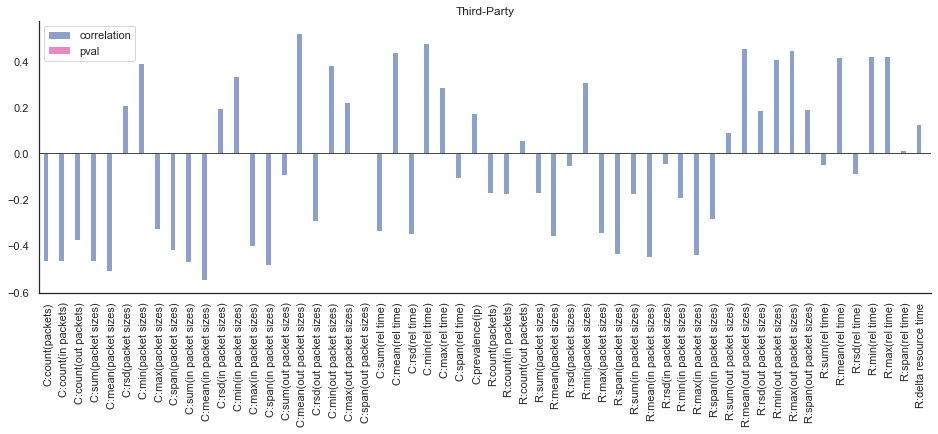

In [58]:
correlation = {col: stats.pointbiserialr(X_resources.loc[third_parties][col], resources.loc[third_parties]['is_tracker']) for col in X_resources.columns[:-1]}
correlation = pd.DataFrame(correlation).T
correlation.columns = ['correlation', 'pval']
#correlation['correlation'] = correlation['correlation'].abs()
#correlation = correlation.sort_values(by='correlation', ascending=False)
ax = correlation.plot.bar(color=color_cycle[2:], width=bar_width, figsize=(16,5), title="Third-Party")
#ax.axhline(correlation['correlation'].mean(), color='r')
ax.axhline(0, linewidth=0.8, color='k')

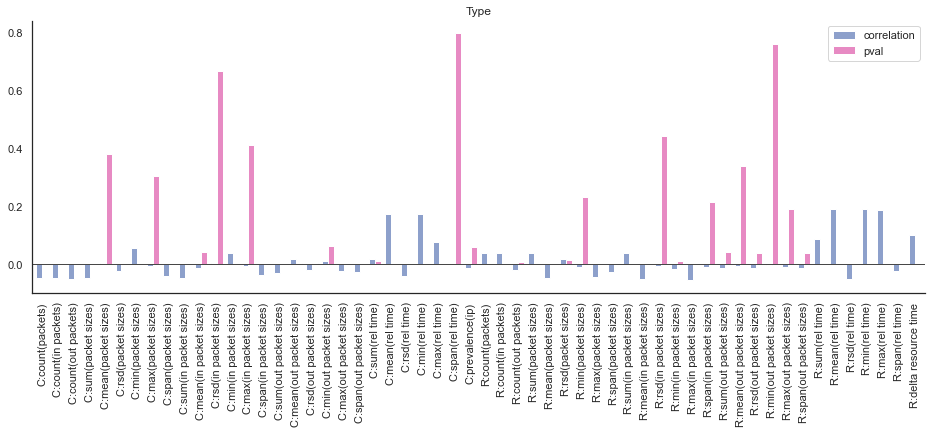

In [59]:
mask = resources.query("type == 'media' | type == 'stylesheet' | type == 'font'").index
correlation = {col: stats.pointbiserialr(X_resources.loc[mask][col], resources.loc[mask]['is_tracker']) for col in X_resources.columns[:-1]}
correlation = pd.DataFrame(correlation).T
correlation.columns = ['correlation', 'pval']
#correlation['correlation'] = correlation['correlation'].abs()
#correlation = correlation.sort_values(by='correlation', ascending=False)
ax = correlation.plot.bar(color=color_cycle[2:], width=bar_width, figsize=(16,5), title="Type")
#ax.axhline(correlation['correlation'].mean(), color='r')
ax.axhline(0, linewidth=0.8, color='k')